# ACH, Kmeans, Clustering

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans


In [153]:
df= pd.read_csv('donnees_totales.csv')

df.set_index('Pays', inplace = True)
df.shape


(158, 9)

# Préparation


In [156]:
X = df.values
X[:5]
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Arabie saoudite', 'Argentine', 'Arménie', 'Australie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur',
       'États-Unis d'Amérique', 'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Pays', length=158)

In [158]:
features = df.columns
features

Index(['Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Production (Milliers de tonnes)', 'Population',
       'Croissance annuelle %',
       'Prévalence de la sous alimentation moyenne (%)',
       'Indice de Production Brut par Personne (Référence 2014-2016)',
       'PIB/habitant', 'Importations (kg par personne'],
      dtype='object')

# Scaling

In [161]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:5]
X_scaled = scaler.fit_transform(X)

In [163]:
# Vérification de la moyenne = 0 et std=1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8
mean -0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

# ACP

In [166]:
n_components = 9
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=9)

In [168]:
pca.explained_variance_ratio_

array([0.32757459, 0.18770375, 0.12499946, 0.10513423, 0.08976086,
       0.06998314, 0.06321398, 0.03037703, 0.00125297])

In [170]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([32.76, 18.77, 12.5 , 10.51,  8.98,  7.  ,  6.32,  3.04,  0.13])

In [172]:
scree_cum = scree.cumsum().round()
scree_cum


array([ 33.,  52.,  64.,  75.,  84.,  91.,  97., 100., 100.])

Les 3 premières composantes expliquent 64% de la variance

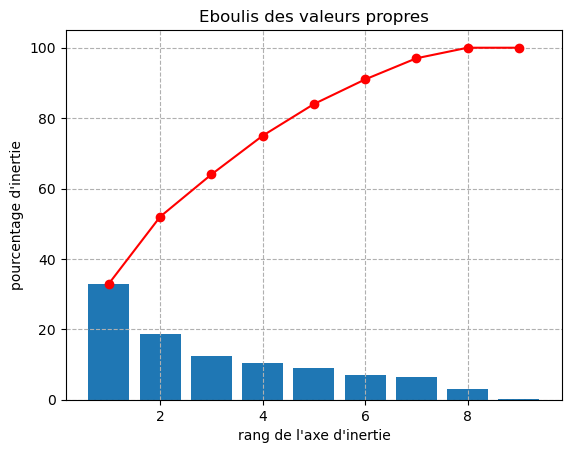

In [175]:
# Représentation graphique
x_list = range(1, n_components+1)
list(x_list)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.grid(True, linestyle='--', alpha=1)
plt.show(block=False)

## Composantes

In [178]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.538525  0.551969  0.137711 -0.030897 -0.040250 -0.342996 -0.055159   
1 -0.015984 -0.023002  0.670799  0.669635  0.127601 -0.128483 -0.022987   
2  0.036163  0.050236 -0.043522 -0.064527  0.691502  0.009946  0.710251   
3  0.145256  0.109740  0.146501  0.209717 -0.431709  0.508459  0.467689   
4  0.180205  0.144859  0.028335  0.036622  0.549349  0.345651 -0.495816   
5 -0.257162 -0.170149 -0.012834  0.183390  0.115588  0.441763 -0.158815   
6 -0.247525 -0.234246 -0.274219  0.382724  0.044562 -0.523885  0.044364   
7 -0.234746 -0.229111  0.656876 -0.566599  0.017519 -0.134633  0.014571   
8 -0.687276  0.723143  0.007607 -0.002185 -0.010605  0.002213  0.001998   

          7         8  
0  0.364962  0.360410  
1  0.008265 -0.259705  
2  0.085226 -0.010785  
3 -0.298033  0.385946  
4 -0.450828  0.272139  
5  0.719583  0.345809  
6 -0.203255  0.585204  
7 -0.063426  0.342365  
8 -0.065317 -0.016293

In [180]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Disponibilité alimentaire en quantité (kg/personne/an)  \
F1                                               0.54        
F2                                              -0.02        
F3                                               0.04        
F4                                               0.15        
F5                                               0.18        
F6                                              -0.26        
F7                                              -0.25        
F8                                              -0.23        
F9                                              -0.69        

    Disponibilité de protéines en quantité (g/personne/jour)  \
F1                                               0.55          
F2                                              -0.02          
F3                                               0.05          
F4                                               0.11          
F5                                               0.14          
F6                                              -0.17          
F7                                              -0.23          
F8                                              -0.23          
F9                                               0.72          

    Production (Milliers de tonnes)  Population  Croissance annuelle %  \
F1                             0.14       -0.03                  -0.04   
F2                             0.67        0.67                   0.13   
F3                            -0.04       -0.06                   0.69   
F4                             0.15        0.21                  -0.43   
F5                             0.03        0.04                   0.55   
F6                            -0.01        0.18                   0.12   
F7                            -0.27        0.38                   0.04   
F8                             0.66       -0.57                   0.02   
F9                             0.01       -0.00                  -0.01   

    Prévalence de la sous alimentation moyenne (%)  \
F1                                           -0.34   
F2                                           -0.13   
F3                                            0.01   
F4                                            0.51   
F5                                            0.35   
F6                                            0.44   
F7                                           -0.52   
F8                                           -0.13   
F9                                            0.00   

    Indice de Production Brut par Personne (Référence 2014-2016)  \
F1                                              -0.06              
F2                                              -0.02              
F3                                               0.71              
F4                                               0.47              
F5                                              -0.50              
F6                                              -0.16              
F7                                               0.04              
F8                                               0.01              
F9                                               0.00              

    PIB/habitant  Importations (kg par personne  
F1          0.36                           0.36  
F2          0.01                          -0.26  
F3          0.09                          -0.01  
F4         -0.30                           0.39  
F5         -0.45                           0.27  
F6          0.72                           0.35  
F7         -0.20                           0.59  
F8         -0.06                           0.34  
F9         -0.07                          -0.02

<Axes: >

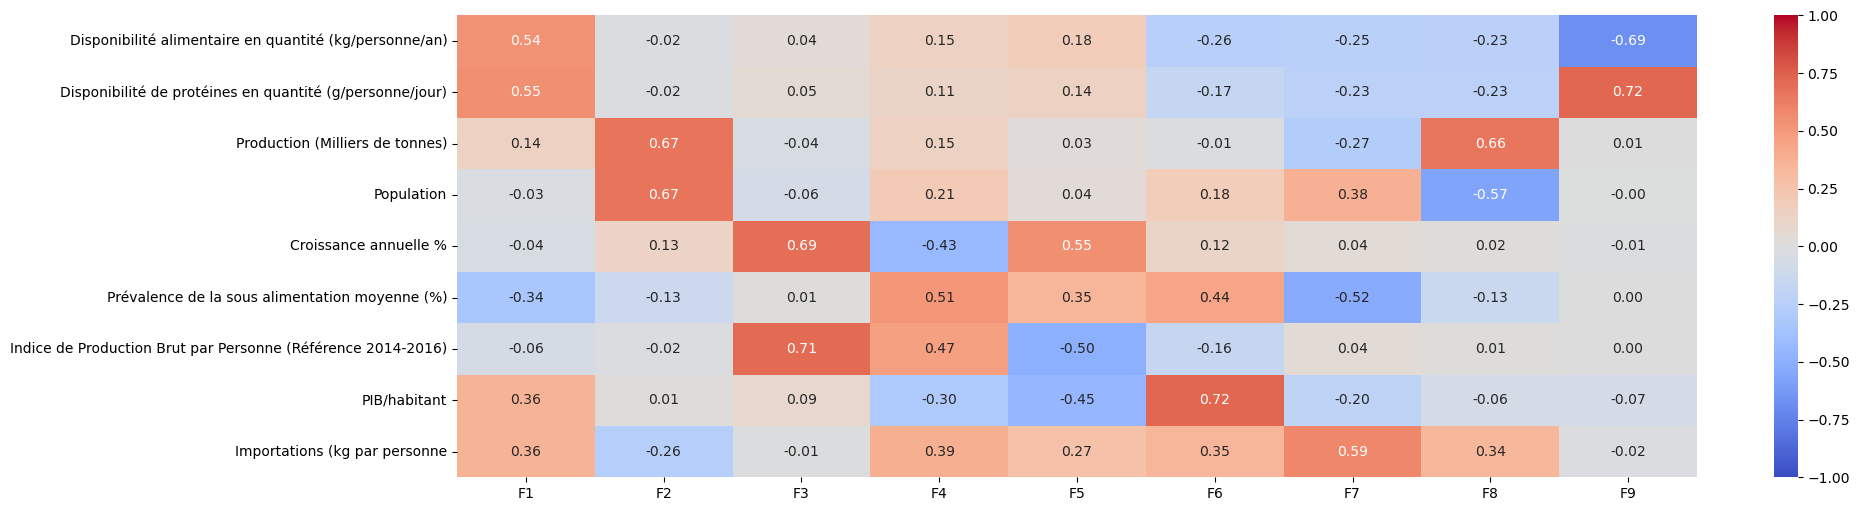

In [182]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## Cercle des corrélations

In [185]:
# Fonction pour la représentation des cercles de corrélations
def correlation_graph(pca, x_y, features) : 
    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

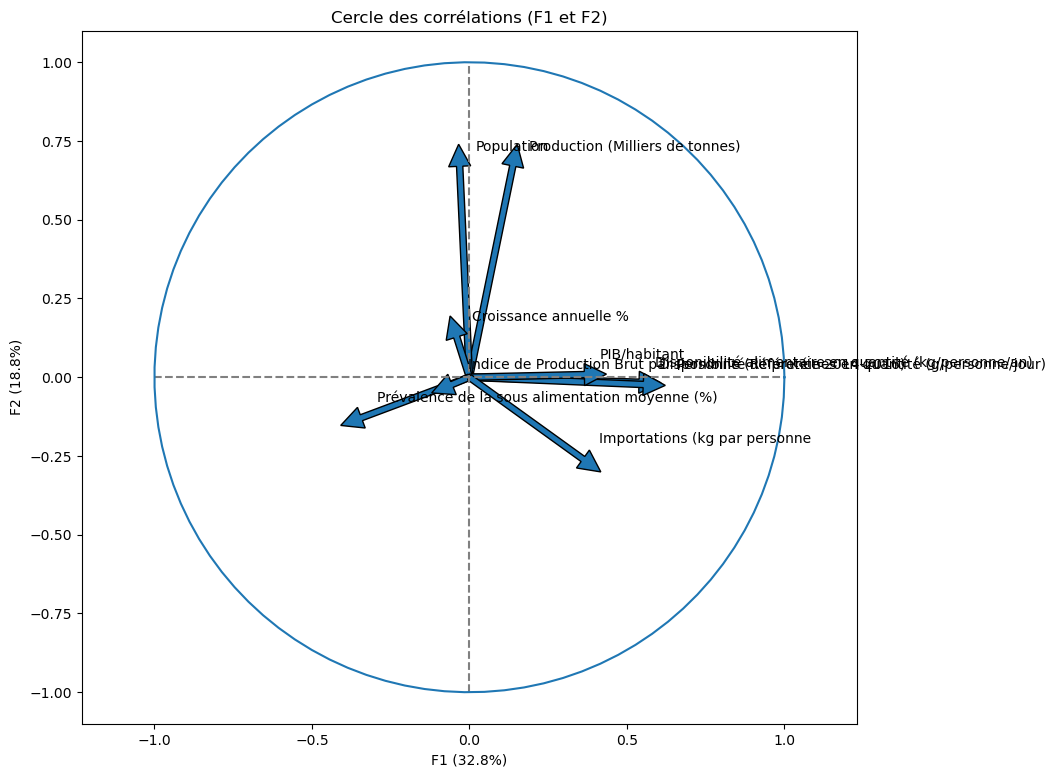

In [187]:
#F1 et F2
x_y = (0,1)
correlation_graph(pca, x_y, features)

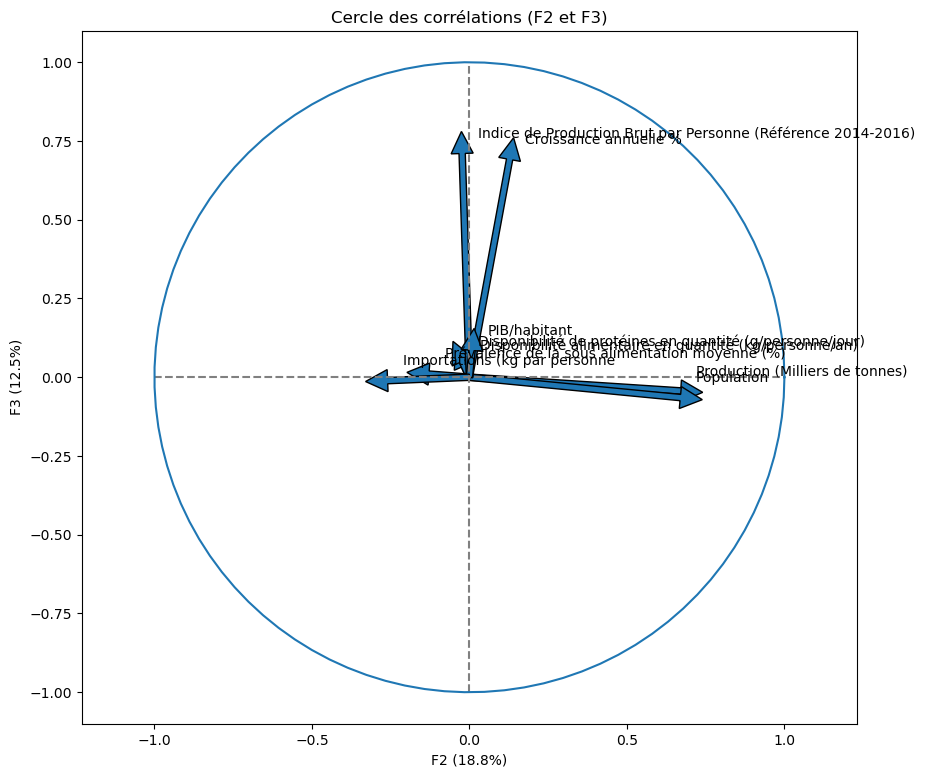

In [189]:
# F2 et F3
x_y = (1,2)
correlation_graph(pca, x_y, features)

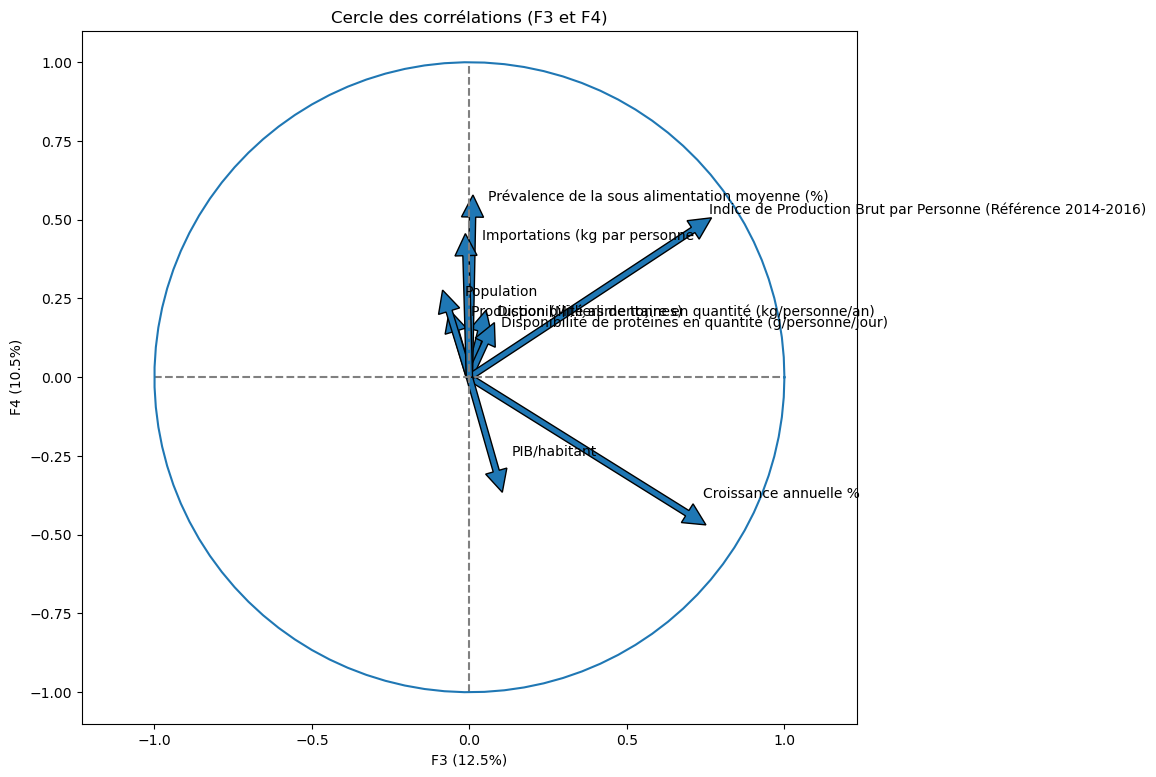

In [191]:
# F3 et F4
x_y = (2,3)
correlation_graph(pca, x_y, features)

## Projection des individus

In [47]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-2.08238554, -0.23998832, -1.26766648, -0.04412142,  0.48955102,
         0.47339941, -0.24884432,  0.06975818,  0.02148026],
       [ 1.26439388,  0.47458777,  0.73322982, -0.4711314 ,  1.43684303,
        -0.66820277, -0.37285802, -0.27736429,  0.23774096],
       [-0.21952188, -0.36211731,  1.05792741,  0.34244481, -0.43400588,
        -0.62235775,  0.61000638,  0.23917203,  0.08068395],
       [-1.13966949,  0.09558394, -0.29746197, -0.56853163, -0.5429946 ,
        -0.49706225,  0.56693907,  0.22408108, -0.02204631],
       [ 0.99919795,  0.426055  , -0.27932276, -0.74729958, -0.842577  ,
         0.87688545,  0.01881846,  0.02571175,  0.03905613]])

In [49]:
# Fonction pour la projection des individus sur le 1er plan factoriel
def display_factorial_planes(X_projected, x_y, pca=None, labels = None, clusters=None, alpha=1, figsize=[10,8], marker="o" ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y



    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='8', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


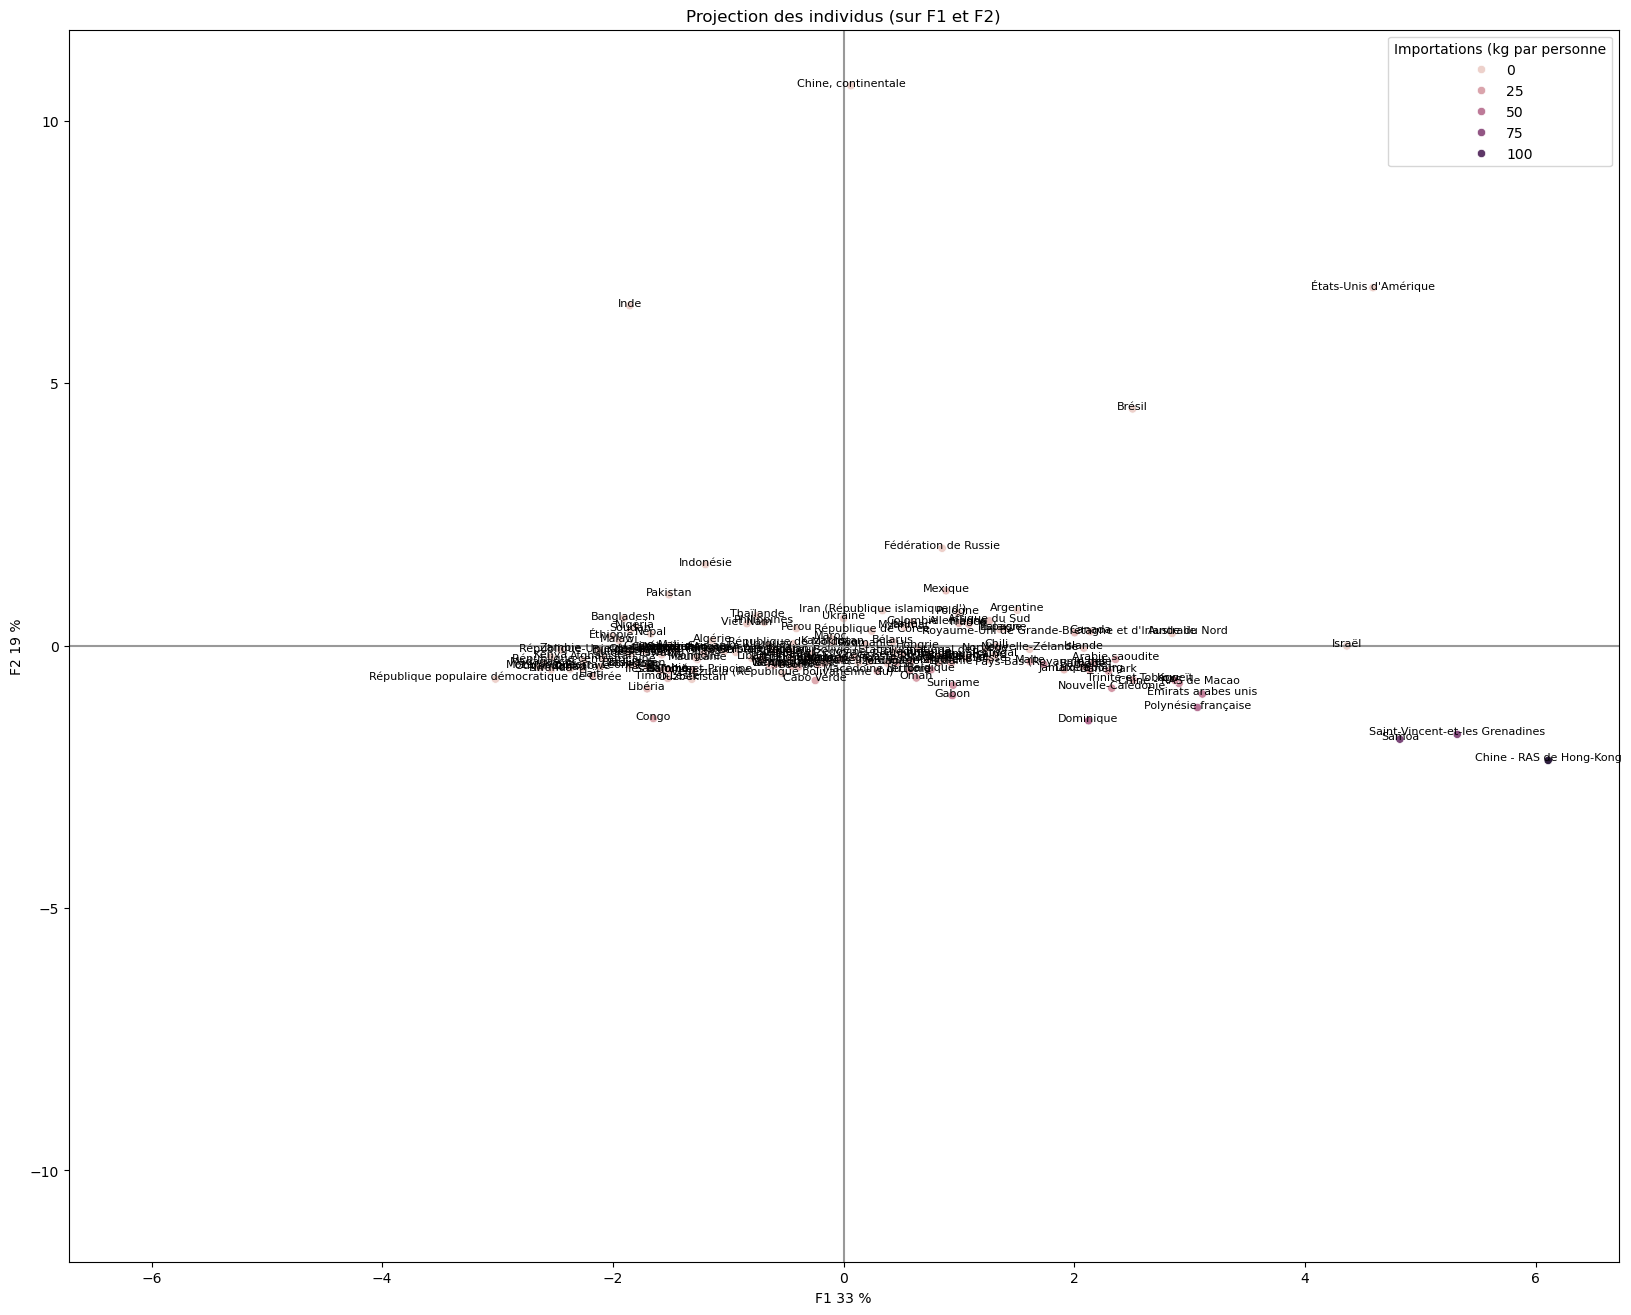

In [51]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['Importations (kg par personne'], marker="o")

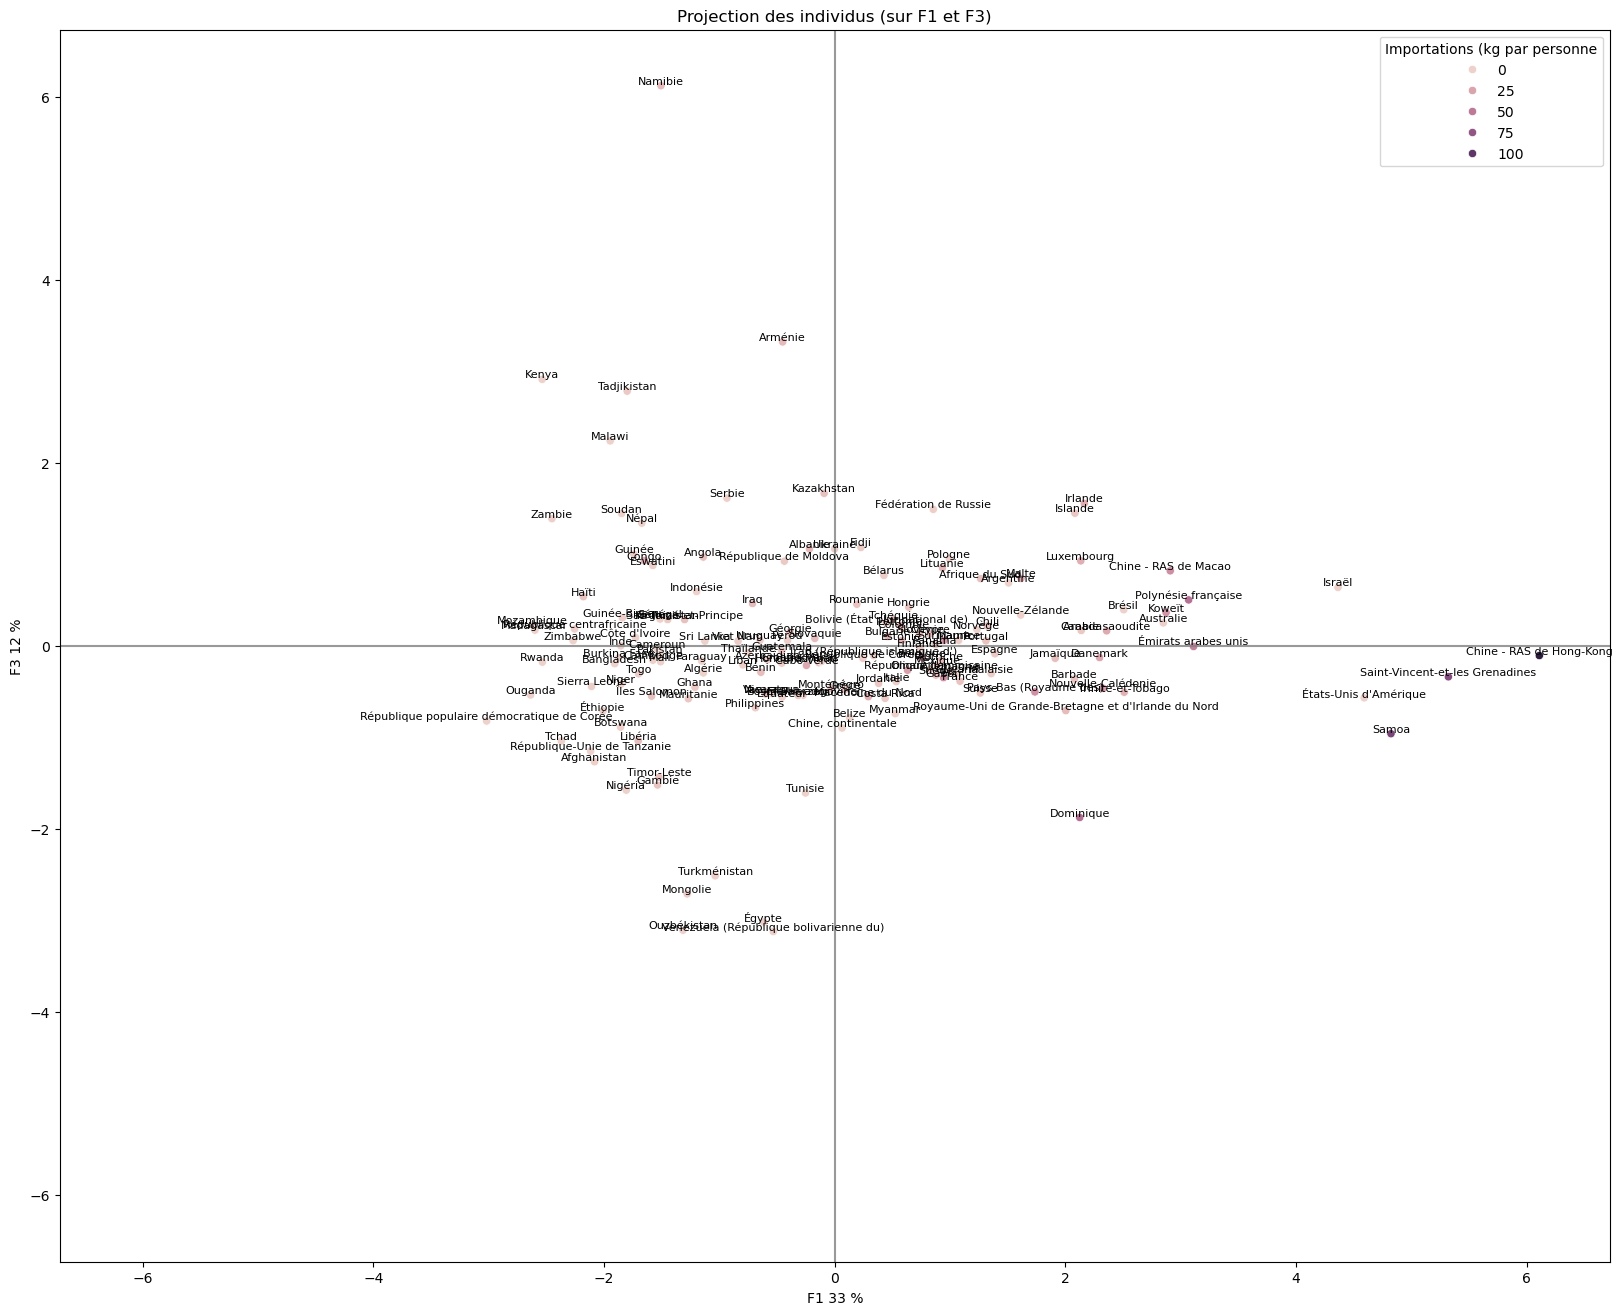

In [52]:
x_y = [0,2]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['Importations (kg par personne'], marker="o")

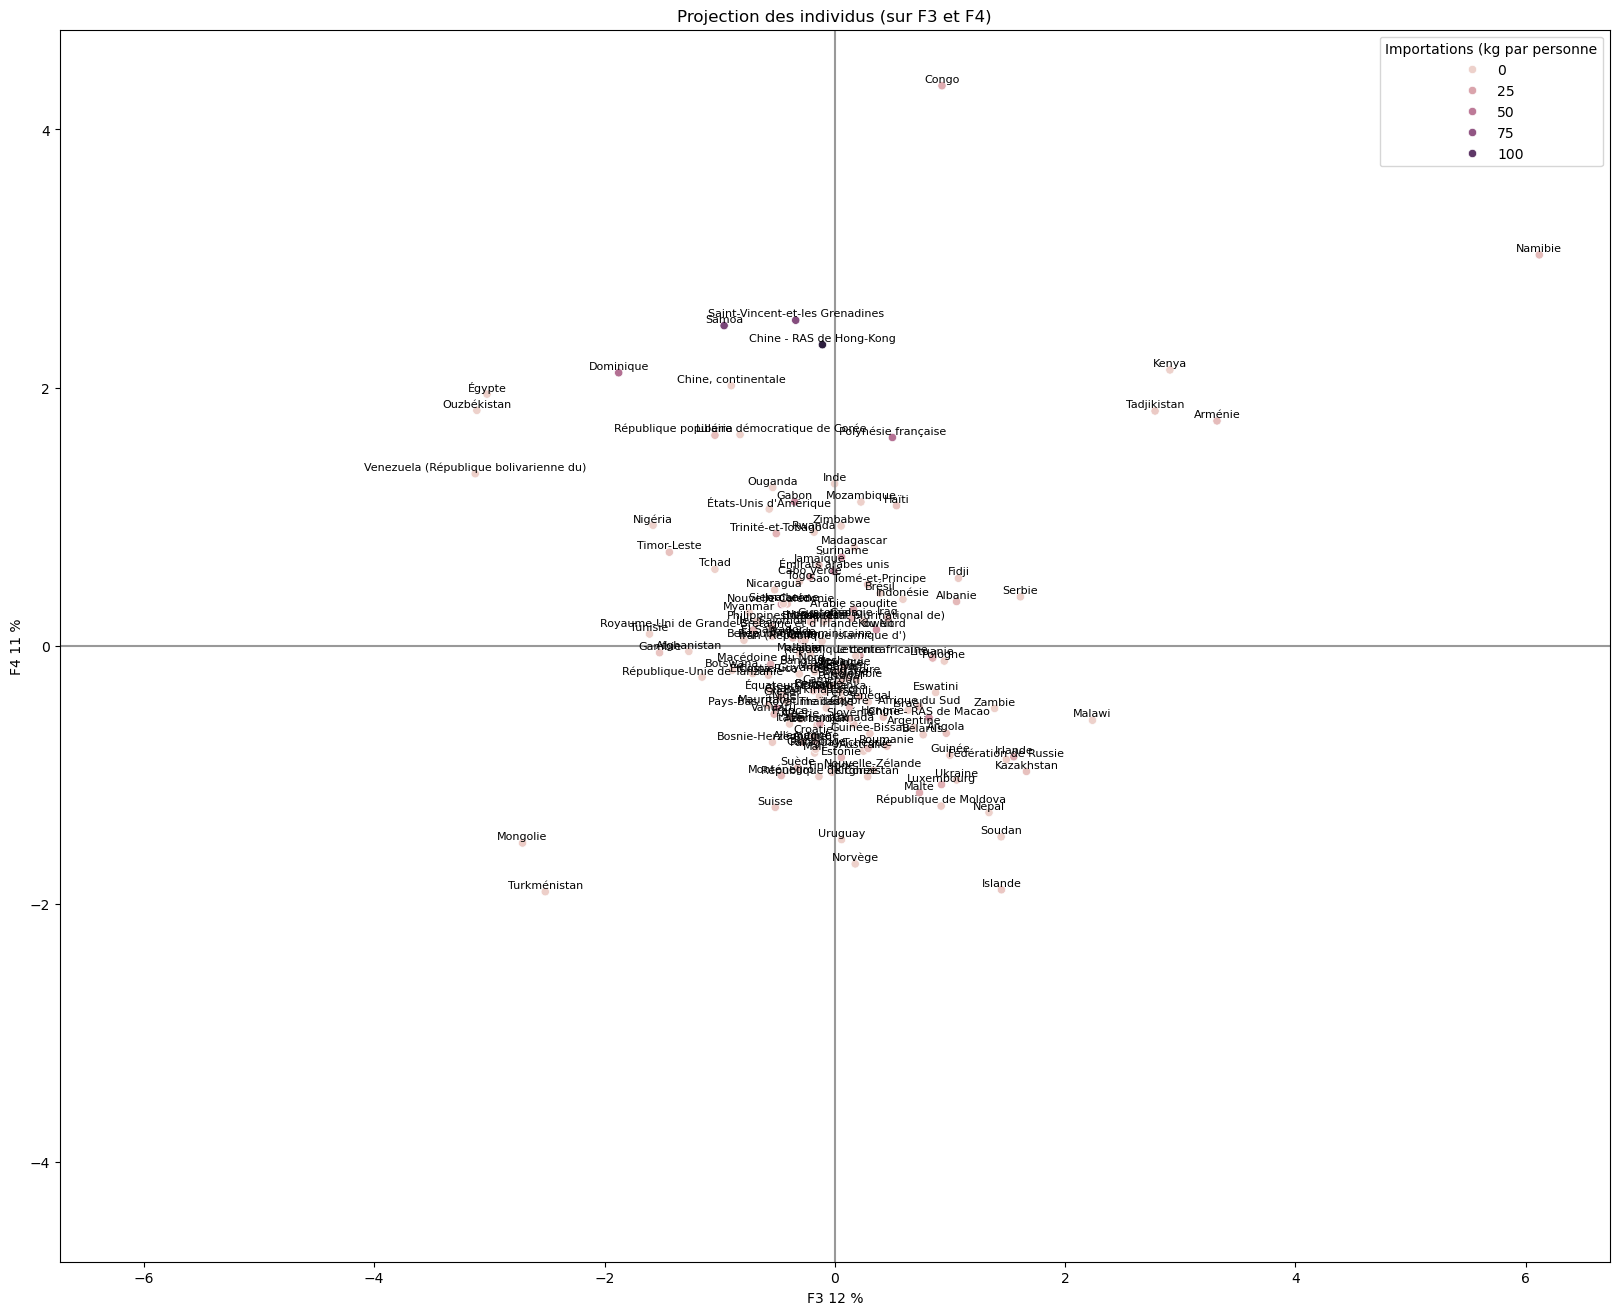

In [53]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['Importations (kg par personne'], marker="o")

# Classification ascendante hiérarchique

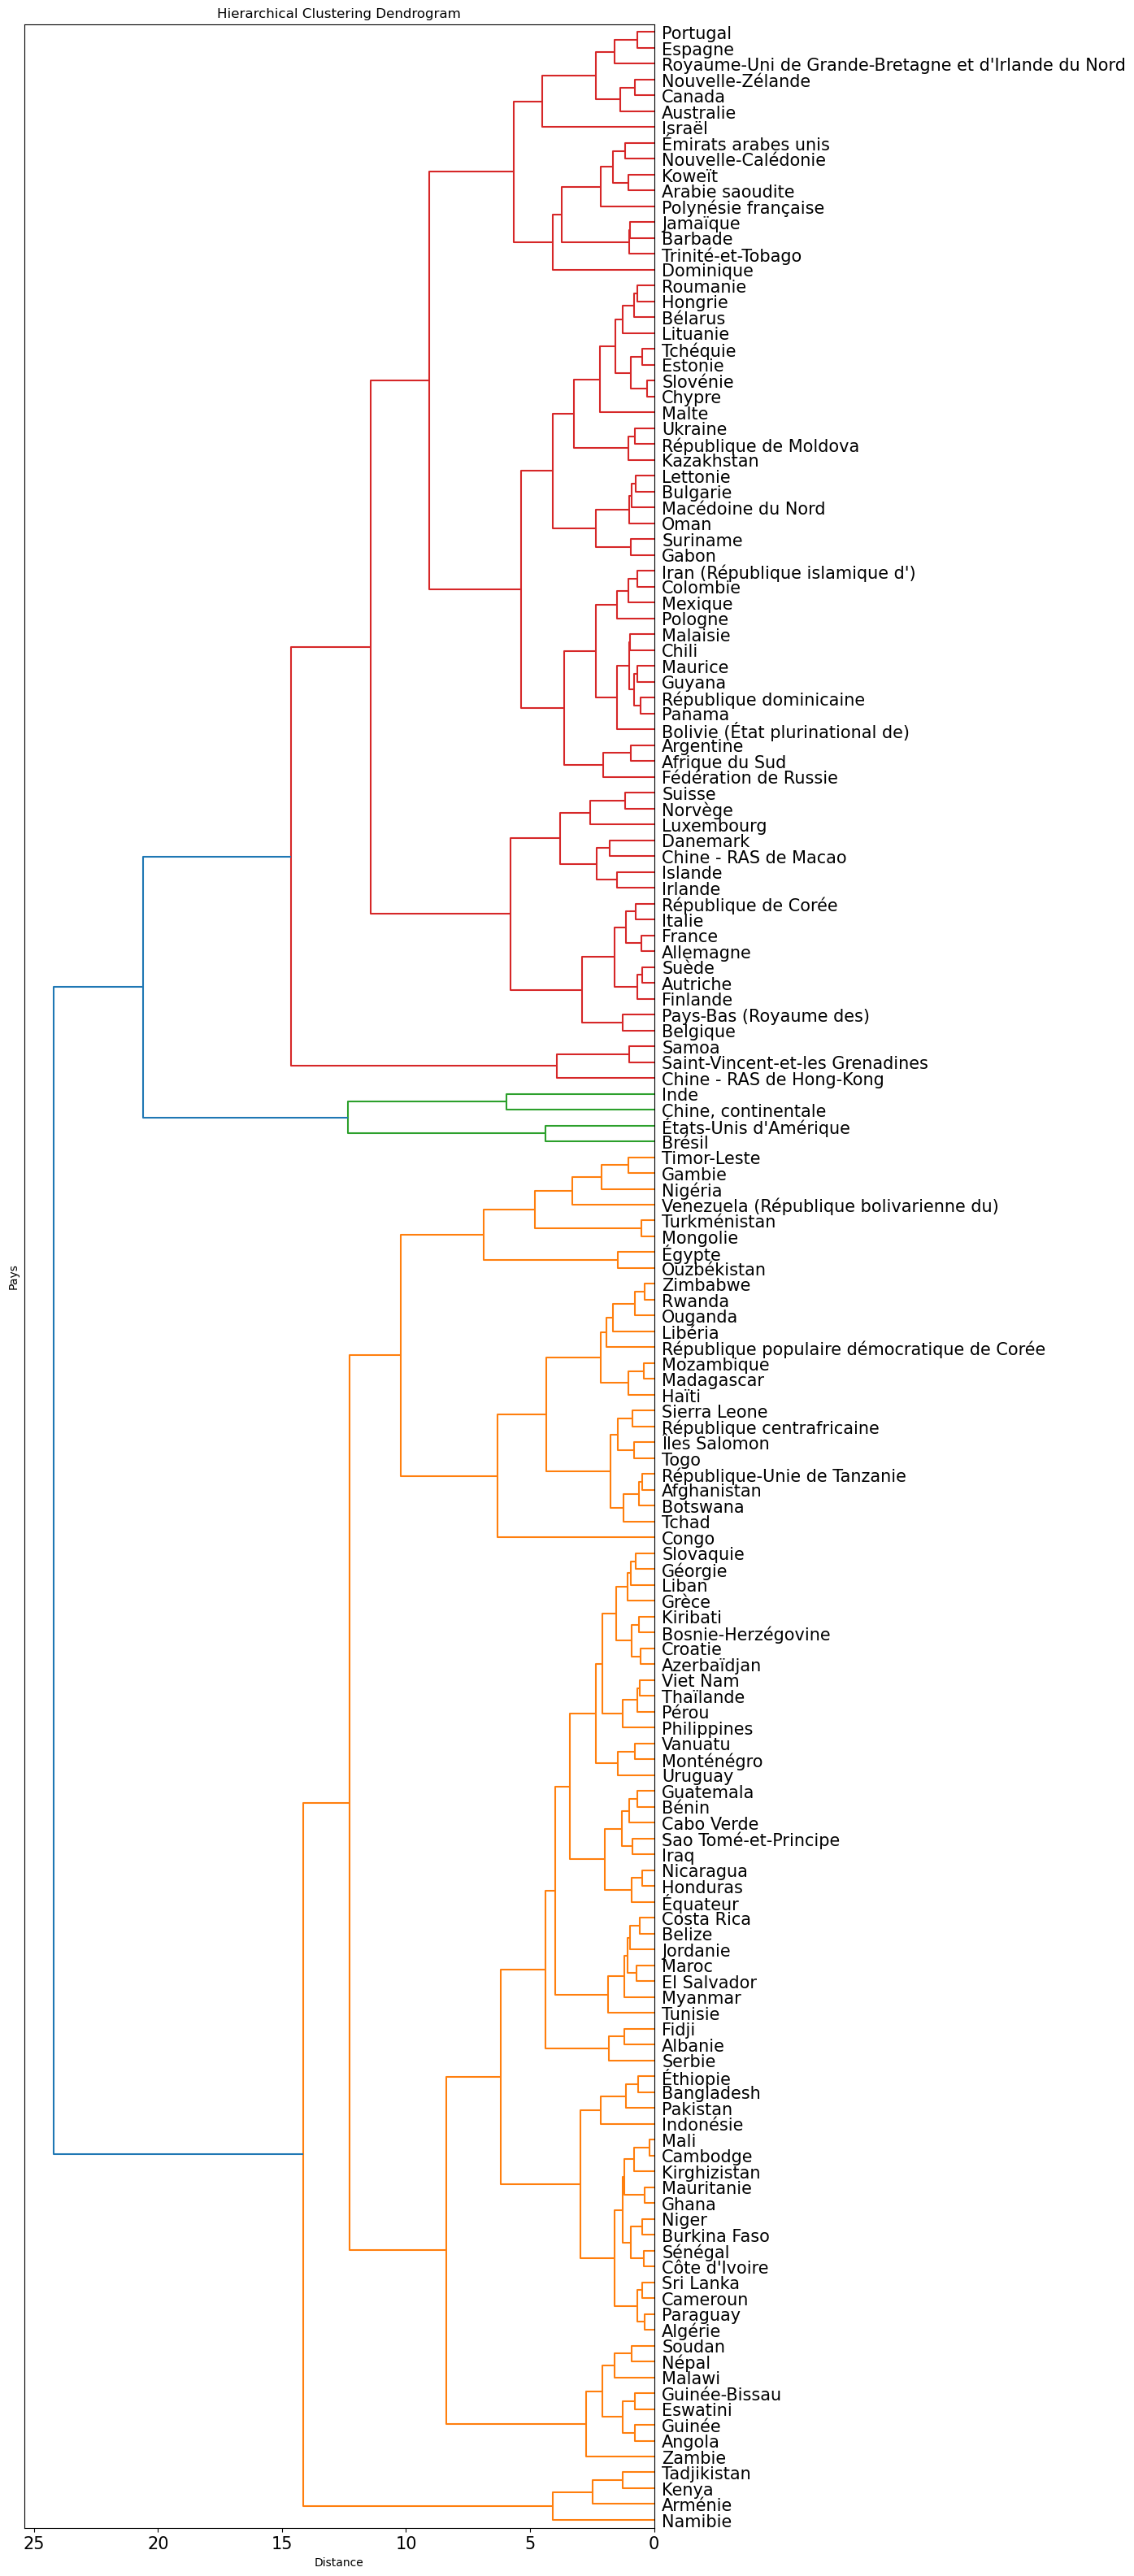

In [56]:
X = df.values
features = df.index
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


Z = linkage(X_scaled, "ward")

fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)


### Clusters

In [59]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

clusters = fcluster(Z, 5, criterion="maxclust")
clusters

array([2, 5, 2, 2, 5, 2, 5, 5, 1, 5, 5, 2, 2, 5, 5, 2, 5, 2, 2, 3, 5, 2,
       5, 2, 2, 2, 2, 5, 5, 4, 5, 3, 5, 5, 2, 2, 2, 2, 5, 5, 2, 5, 5, 2,
       2, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 3, 2, 5, 2, 5, 5,
       5, 5, 5, 2, 5, 1, 2, 2, 5, 5, 2, 2, 5, 5, 5, 2, 5, 2, 2, 5, 2, 5,
       2, 5, 2, 2, 2, 2, 1, 2, 2, 2, 5, 5, 5, 2, 5, 2, 2, 2, 5, 2, 5, 2,
       5, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5, 2, 2, 4, 4, 2, 2, 2, 2, 5, 2, 2,
       5, 5, 5, 2, 1, 2, 5, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 3, 2, 2], dtype=int32)

In [60]:
df_clusters = pd.DataFrame({"cluster" : clusters, "Pays" : names})

df_clusters.head()

cluster            Pays
0        2     Afghanistan
1        5  Afrique du Sud
2        2         Albanie
3        2         Algérie
4        5       Allemagne

In [61]:
df_clusters['cluster'].value_counts()

cluster
2    83
5    64
1     4
3     4
4     3
Name: count, dtype: int64

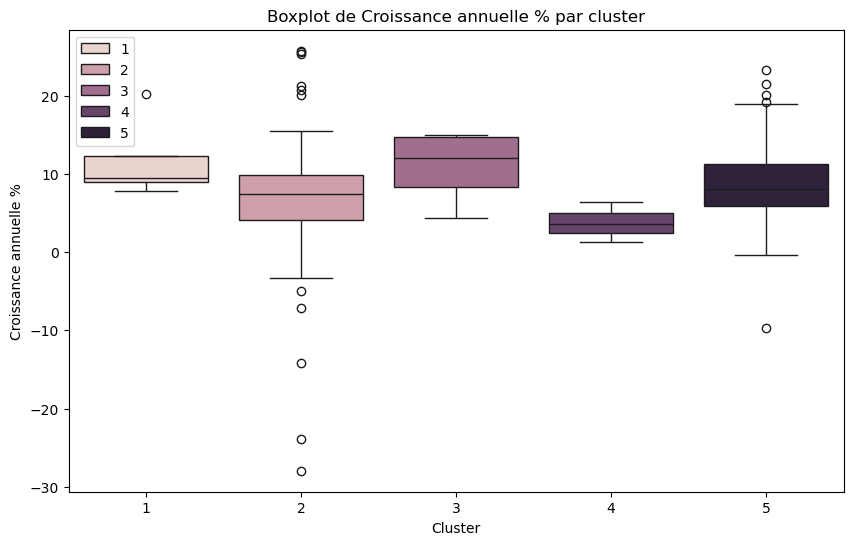

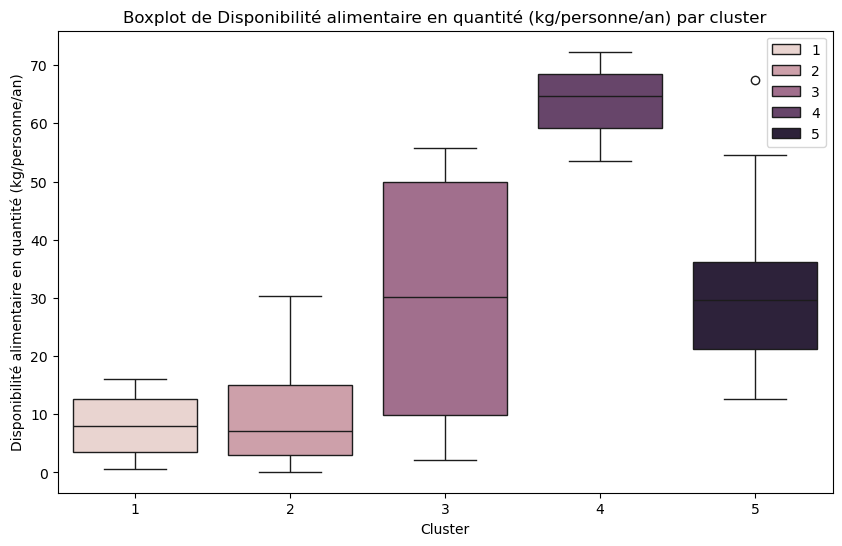

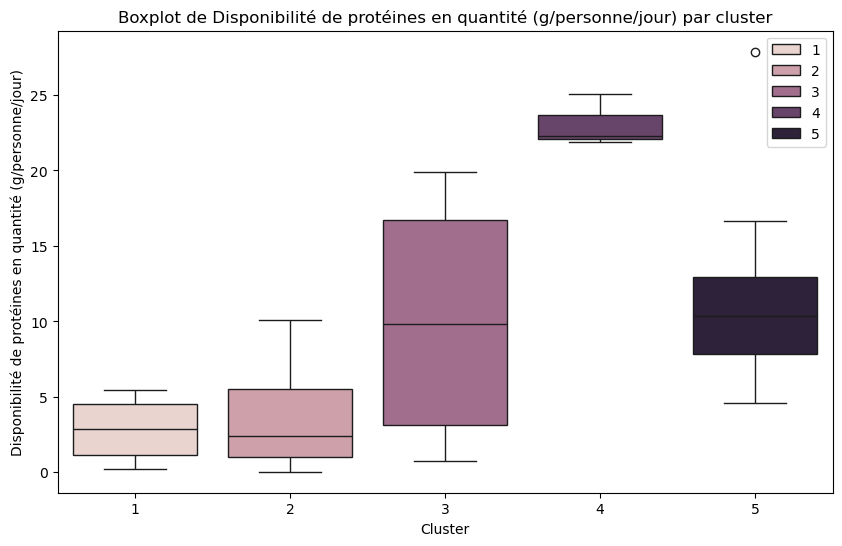

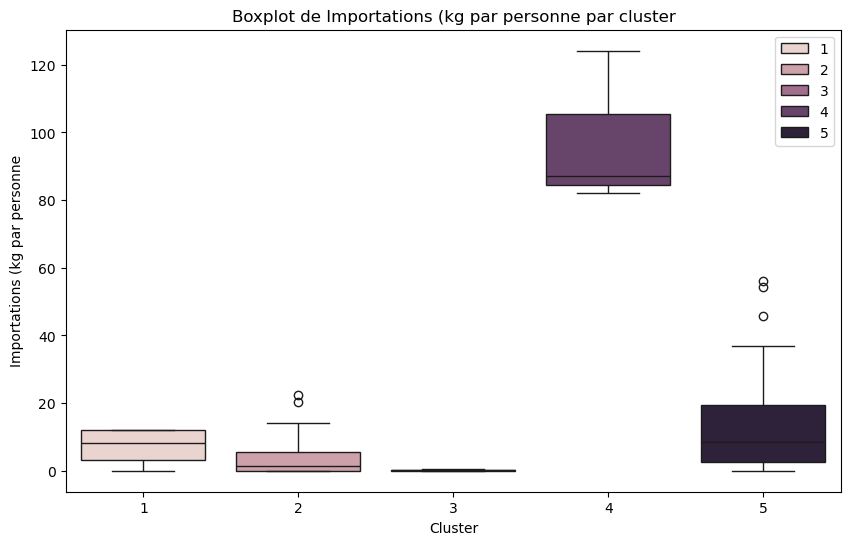

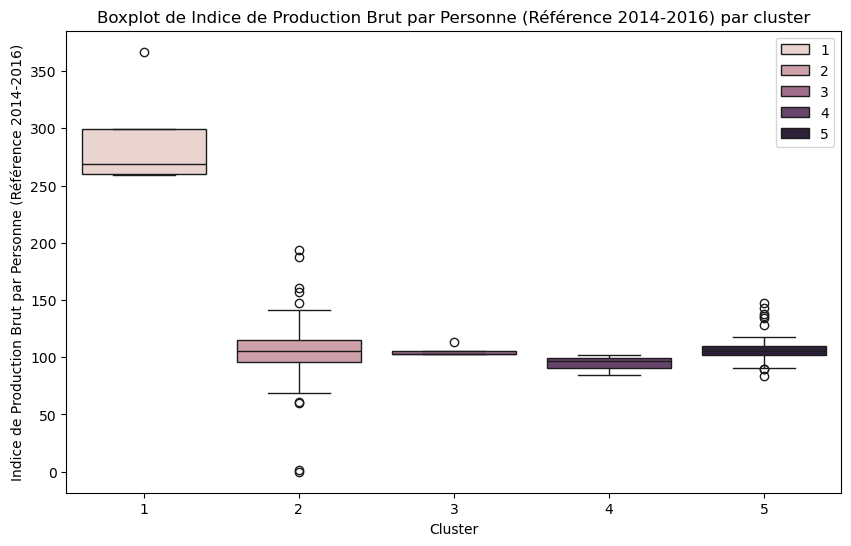

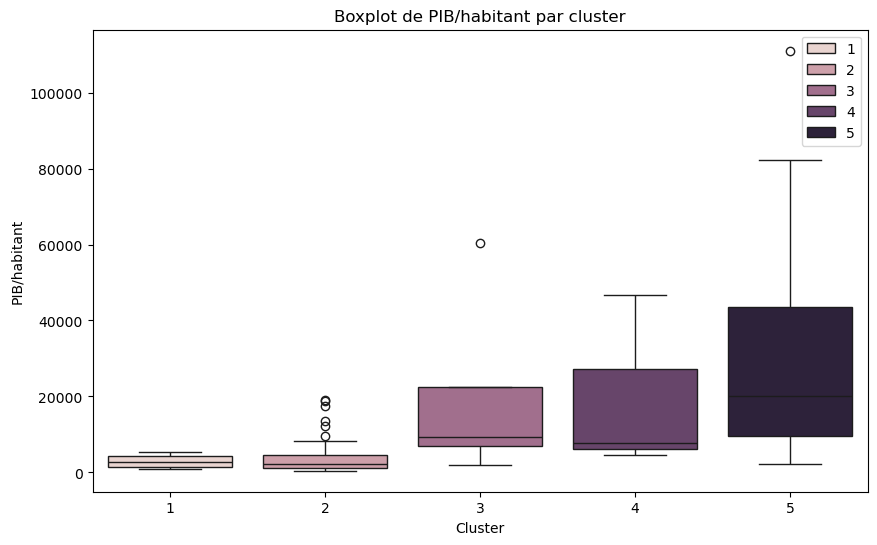

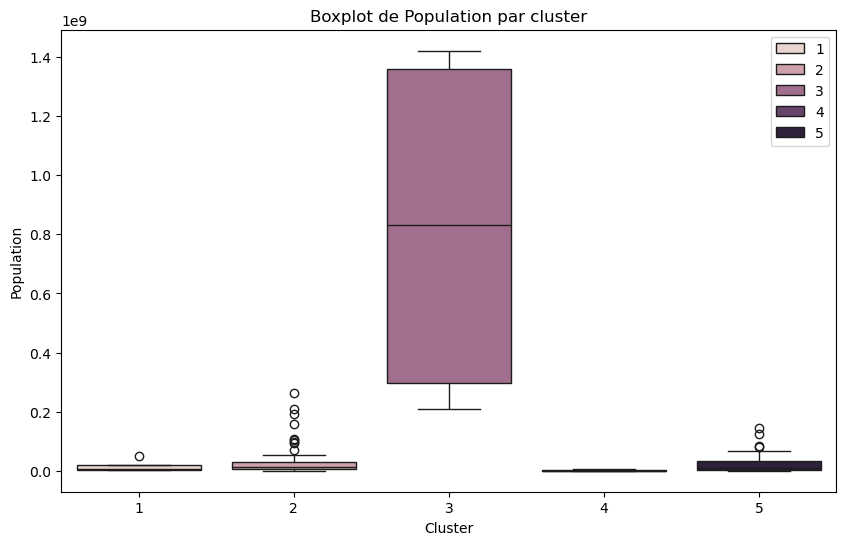

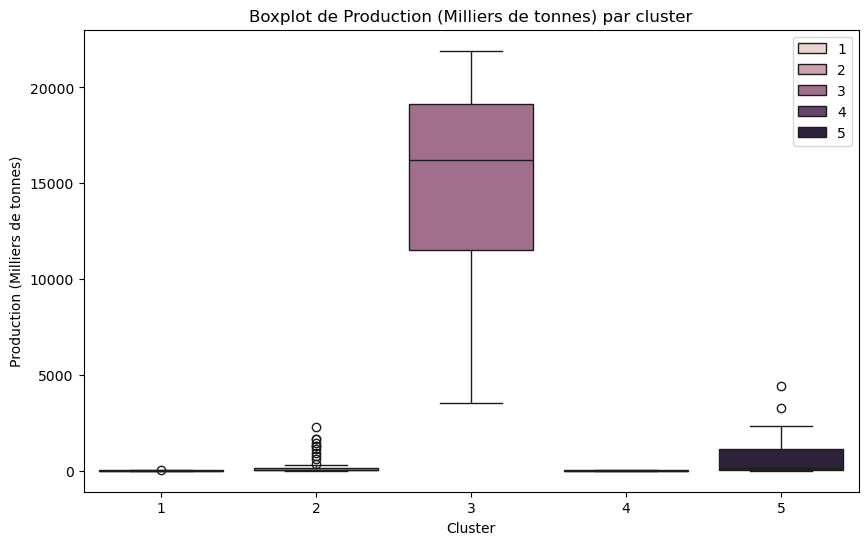

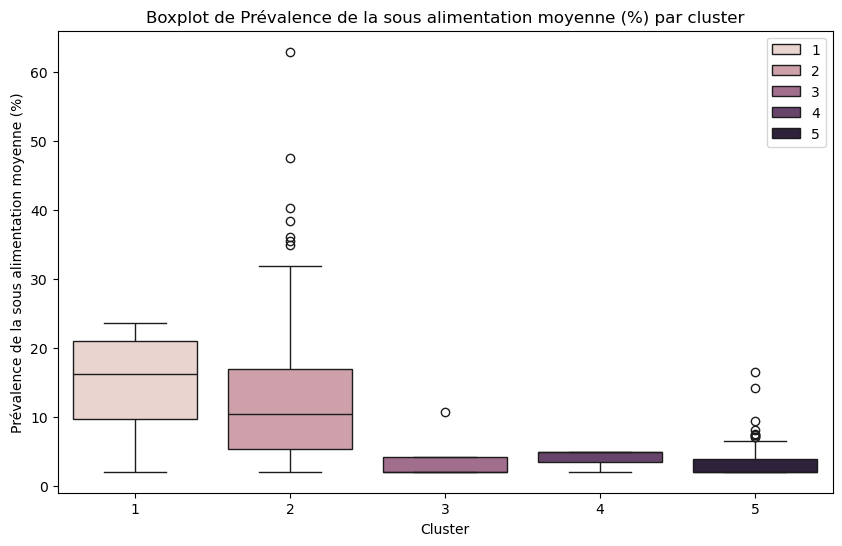

In [63]:
df["cluster"] = clusters
variables = df.columns.difference(["cluster", "Pays"])
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="cluster", y=var, hue=clusters)
    plt.title(f"Boxplot de {var} par cluster")
    plt.xlabel("Cluster")
    plt.ylabel(var)
    plt.show()

Le cluster 5 semble le plus intéressant, le 4 pourrait l'être mais le marché semblre très concurrentiel, le cluster 3 est à analyser plus en profondeur car s'il produit beaucoup de volaille
la disponibilité de protéines/personne est très hétérogène.

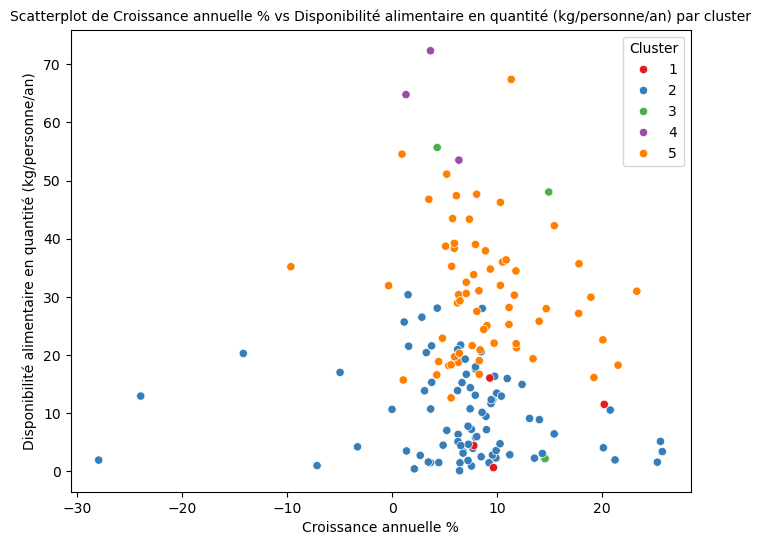

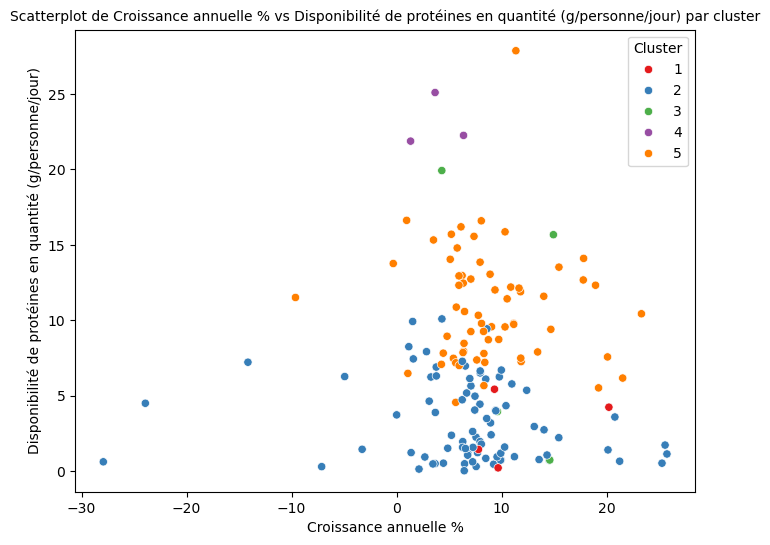

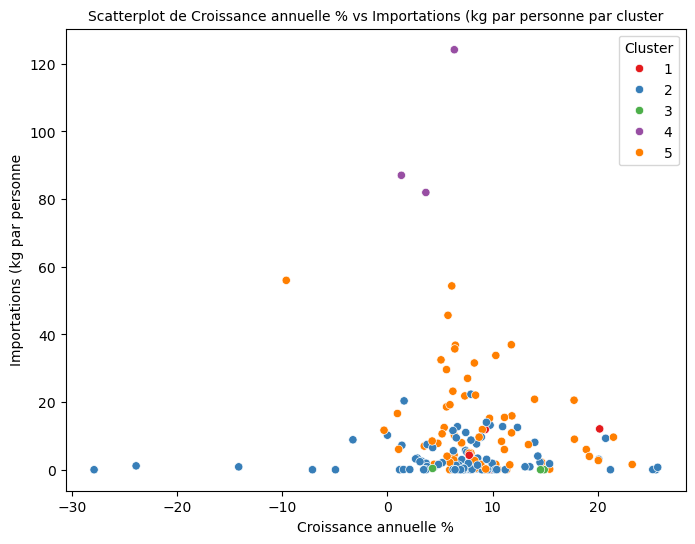

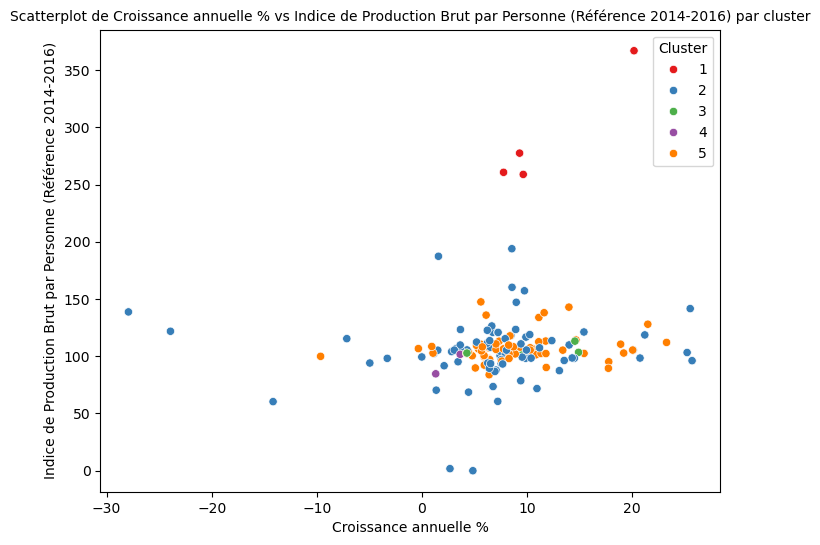

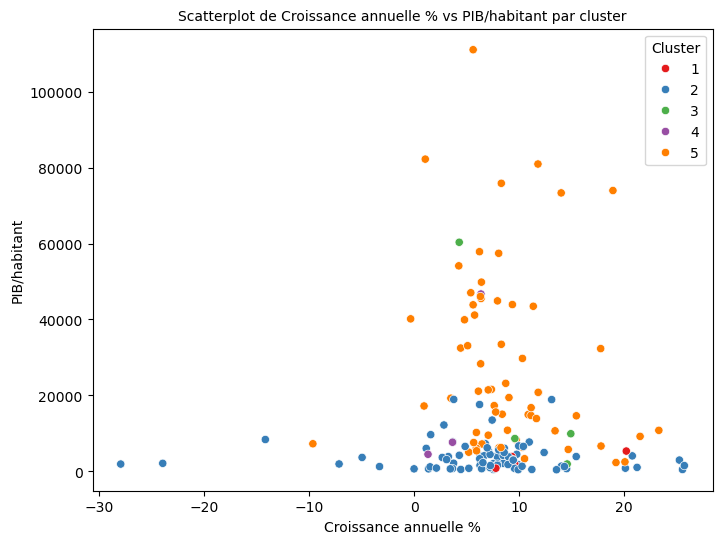

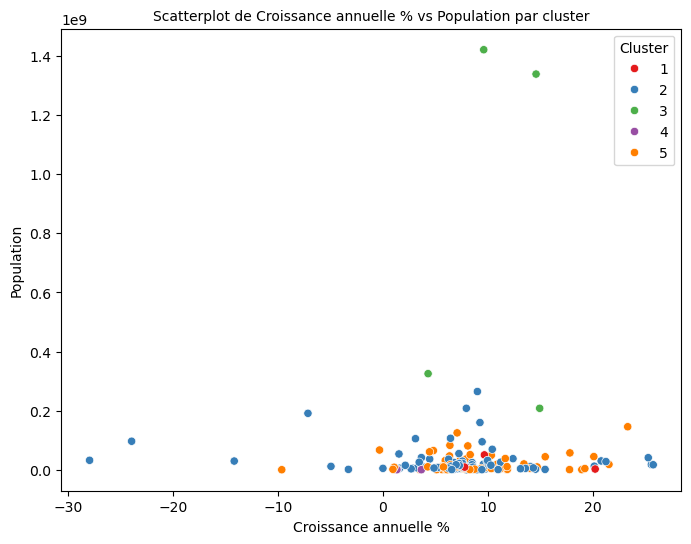

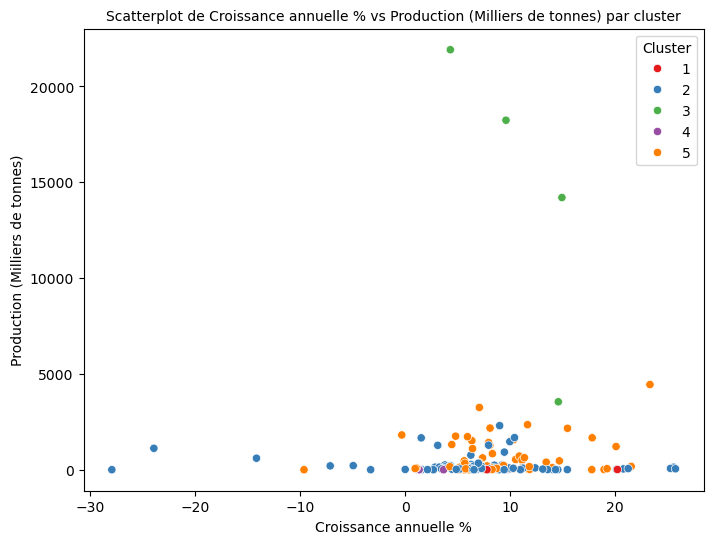

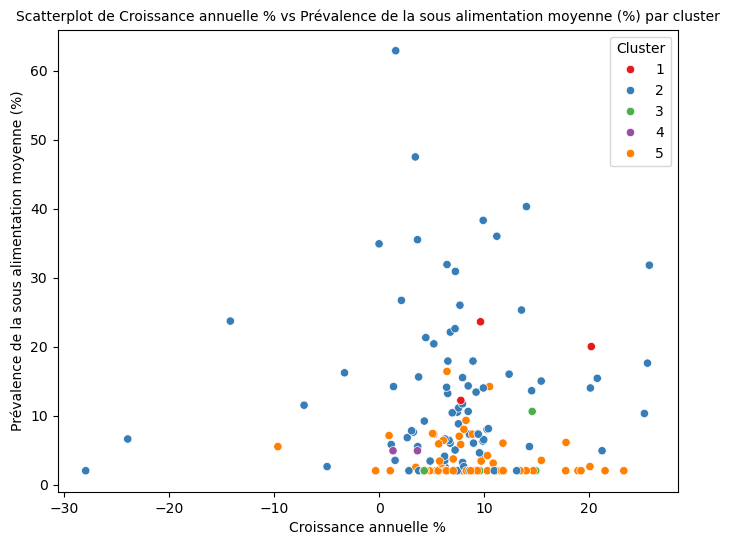

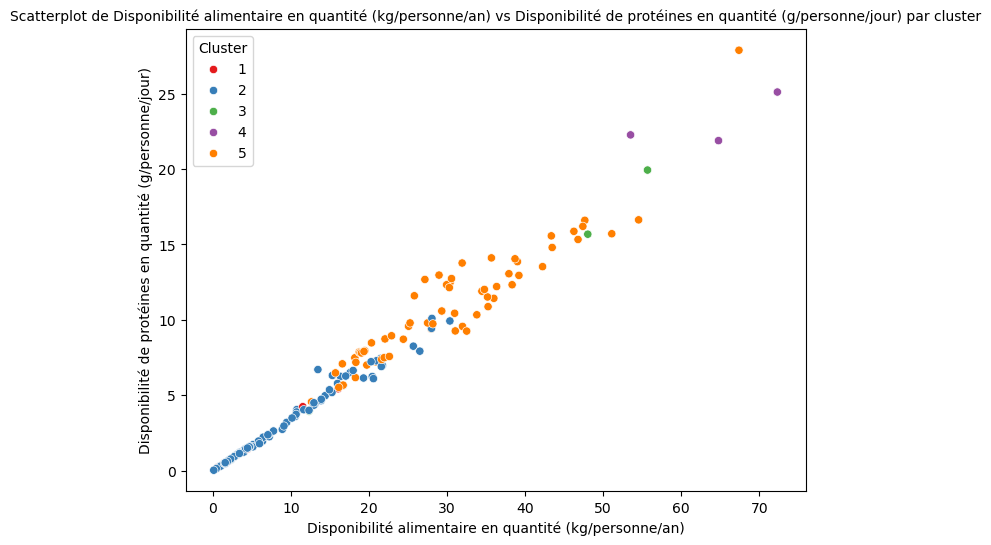

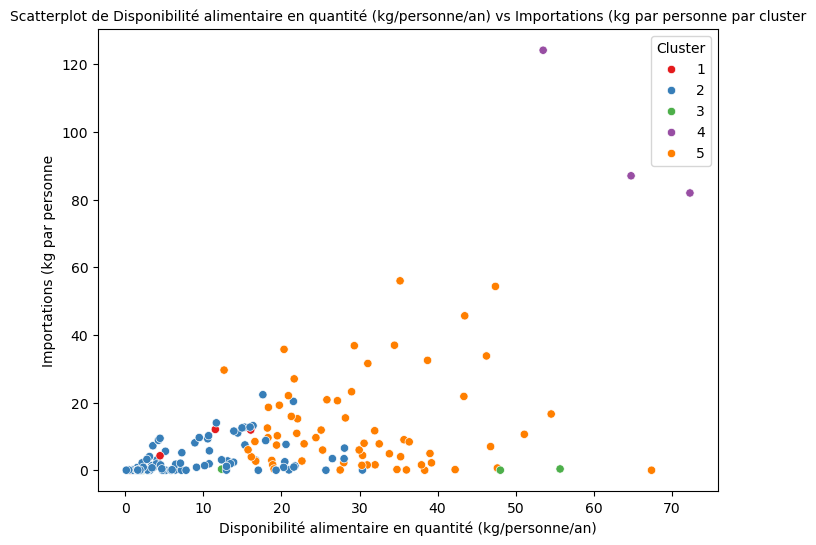

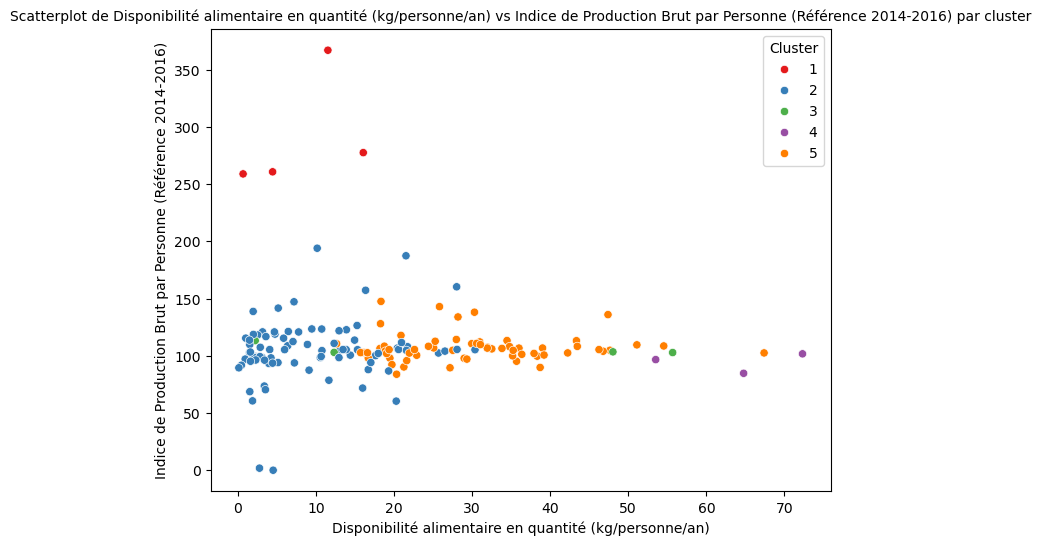

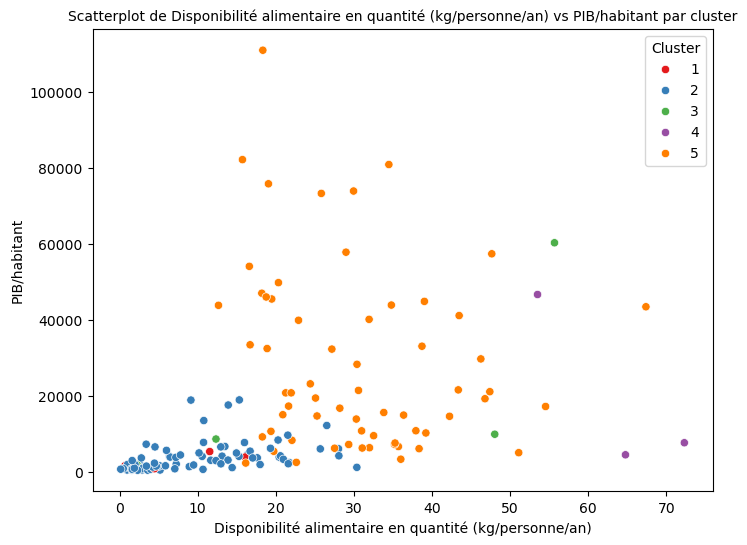

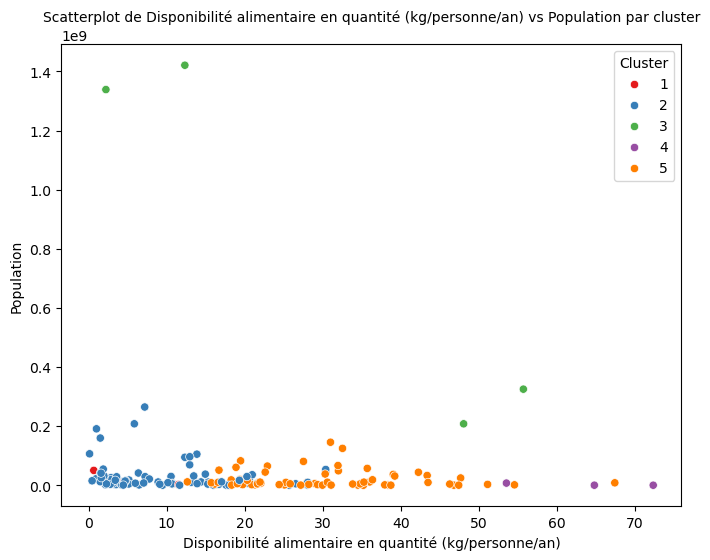

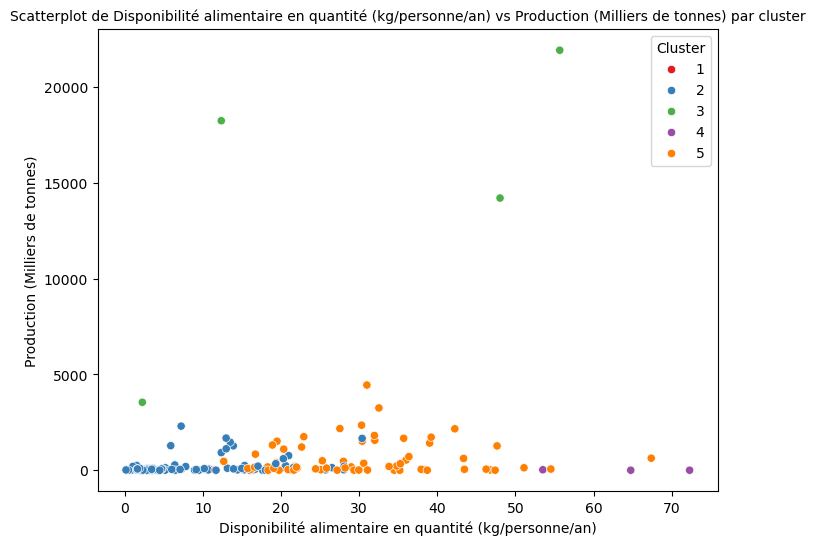

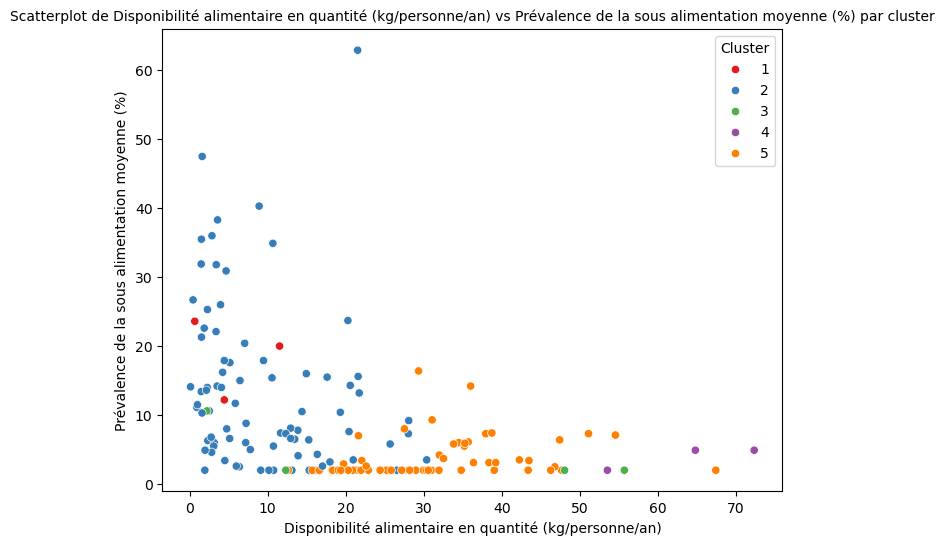

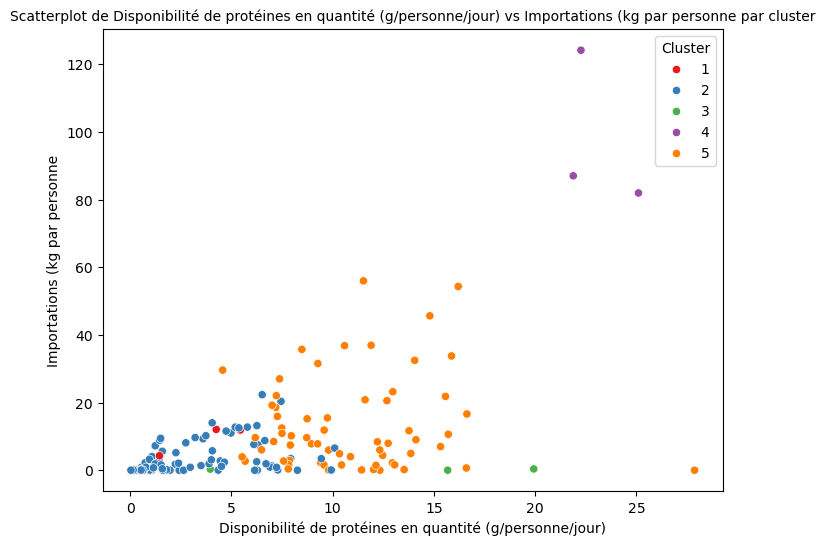

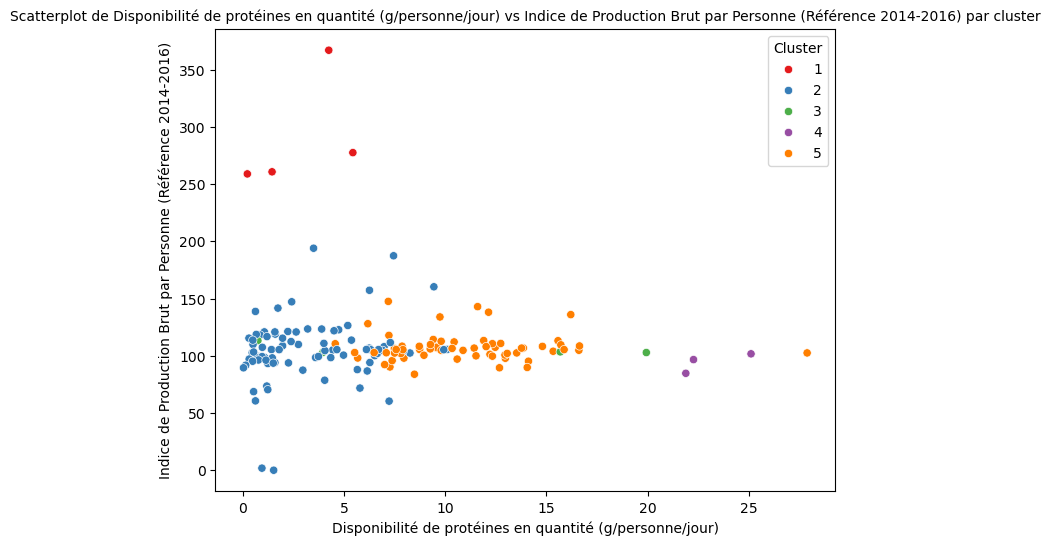

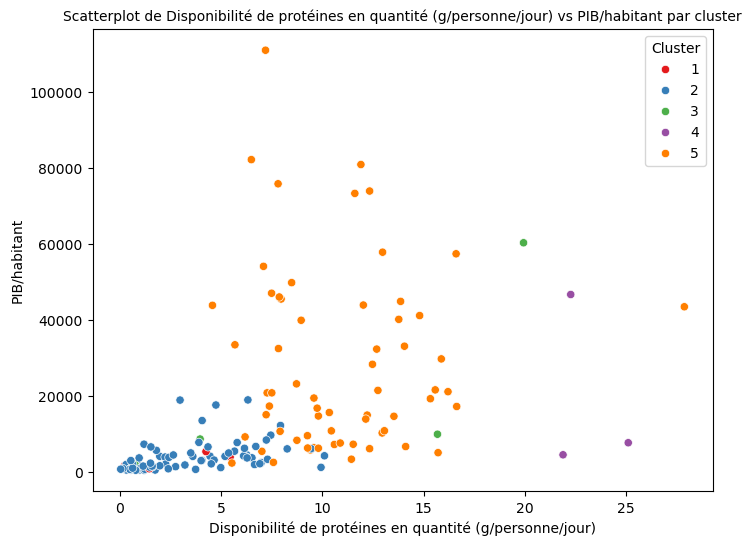

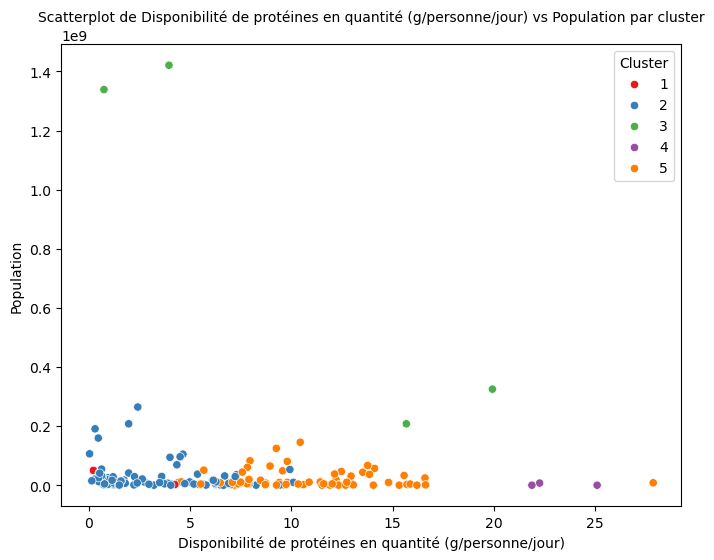

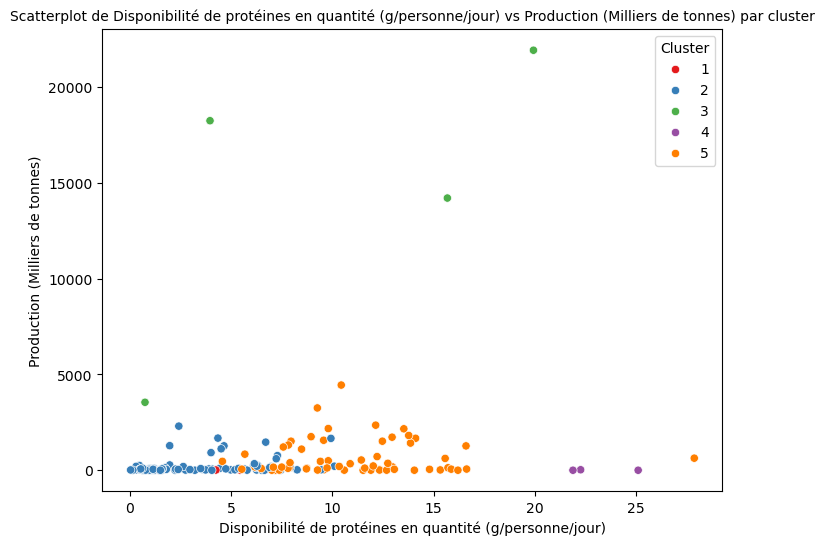

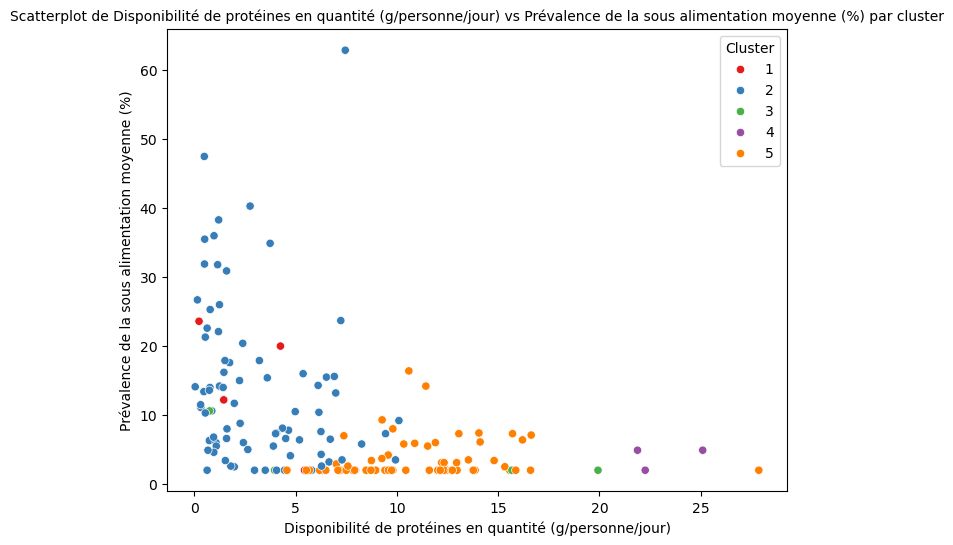

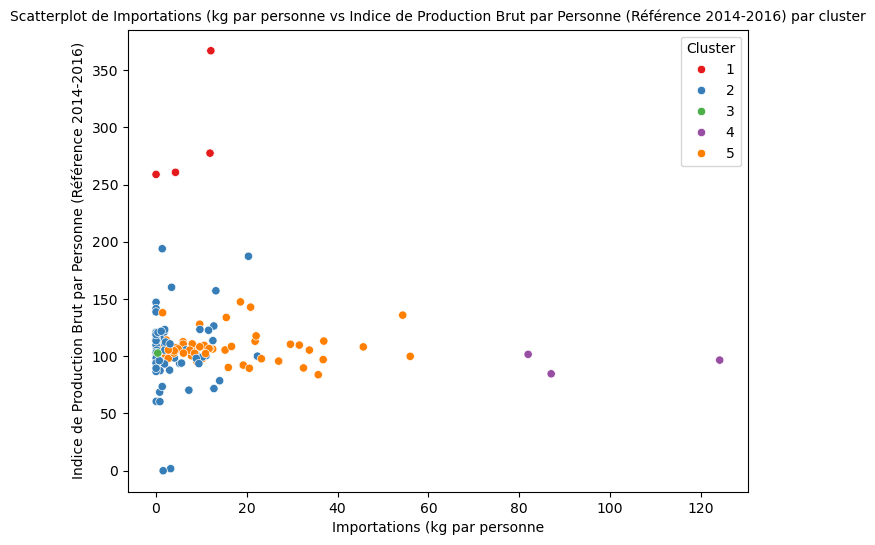

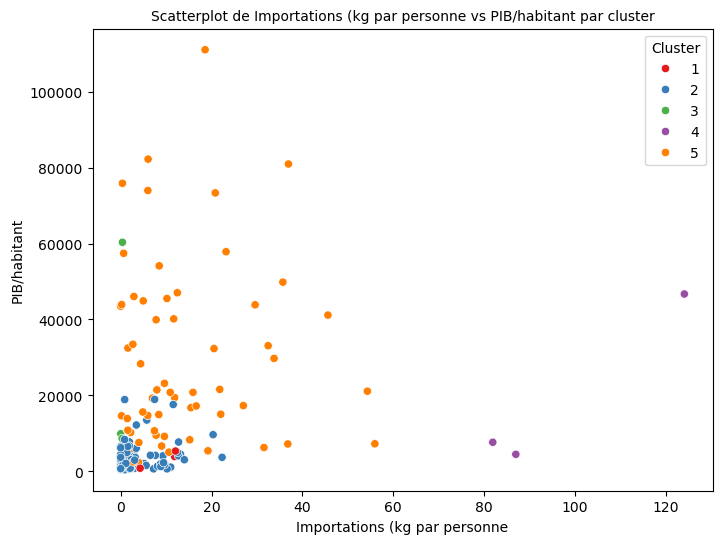

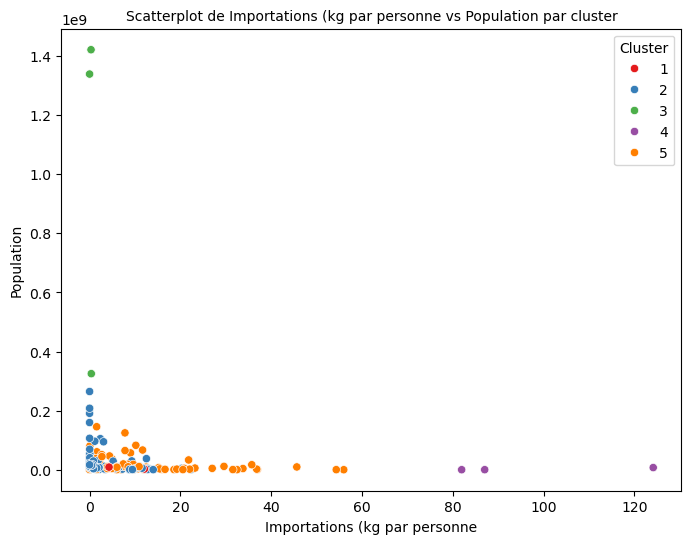

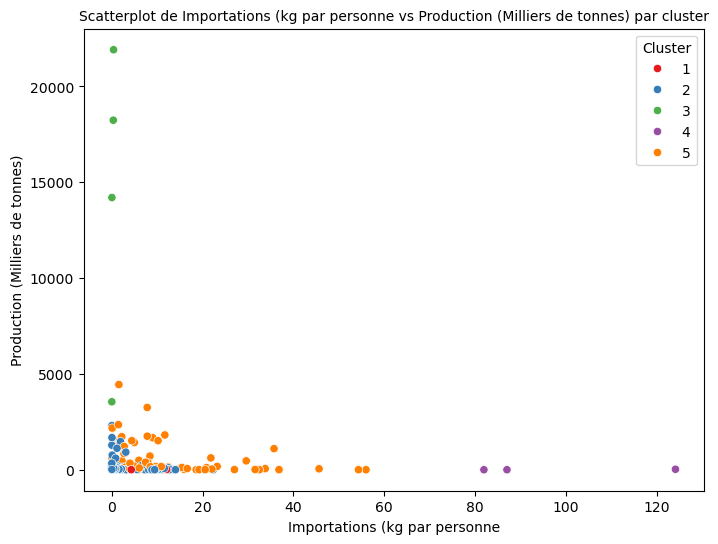

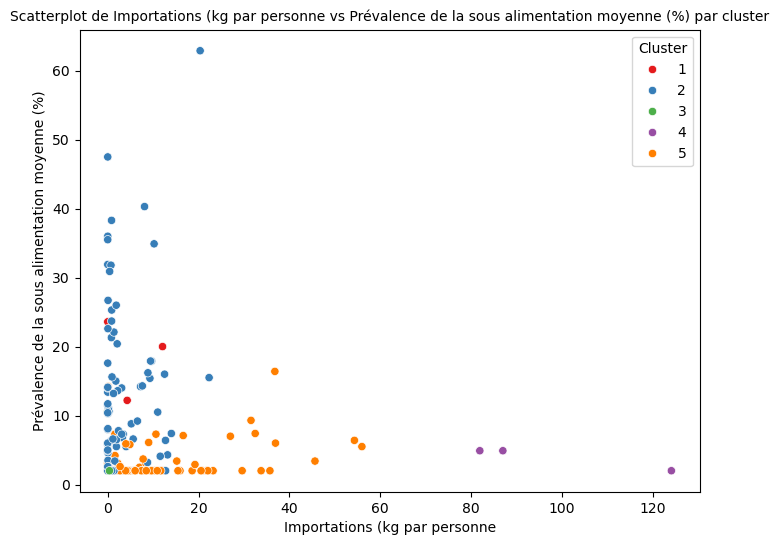

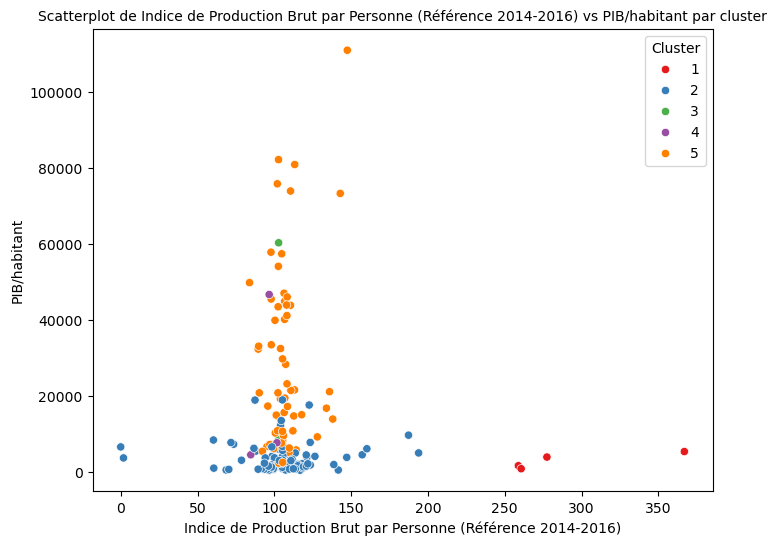

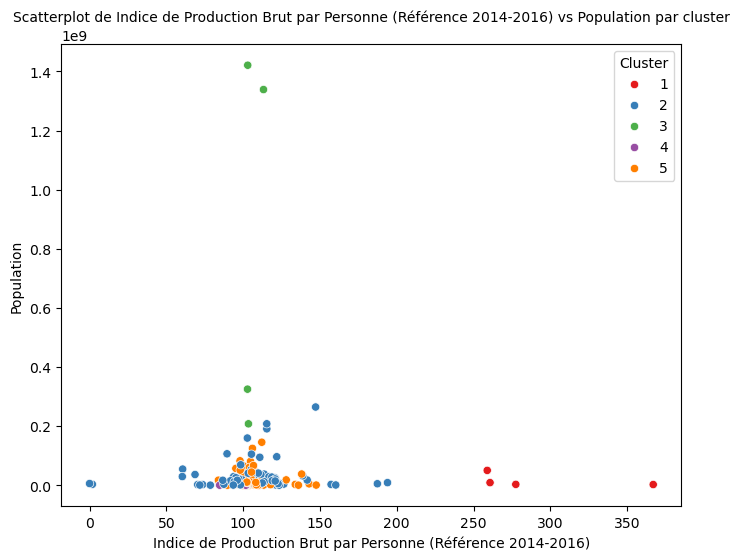

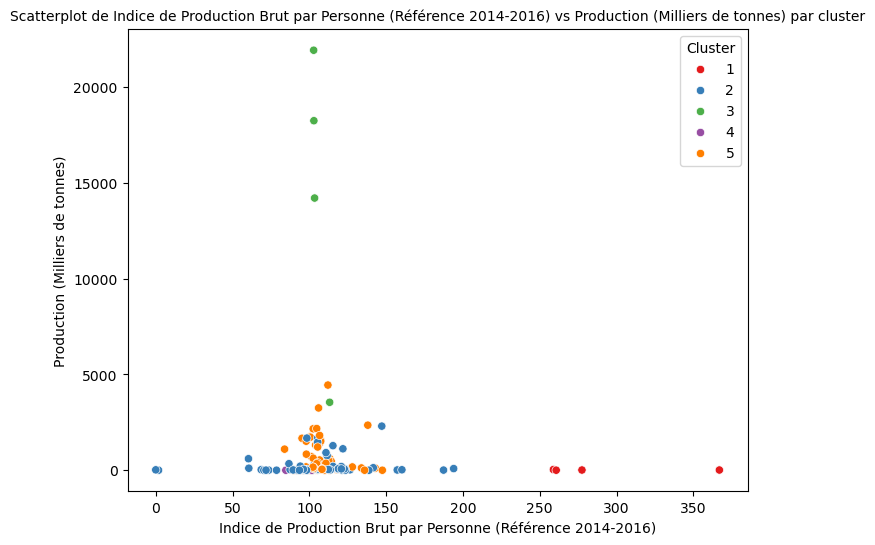

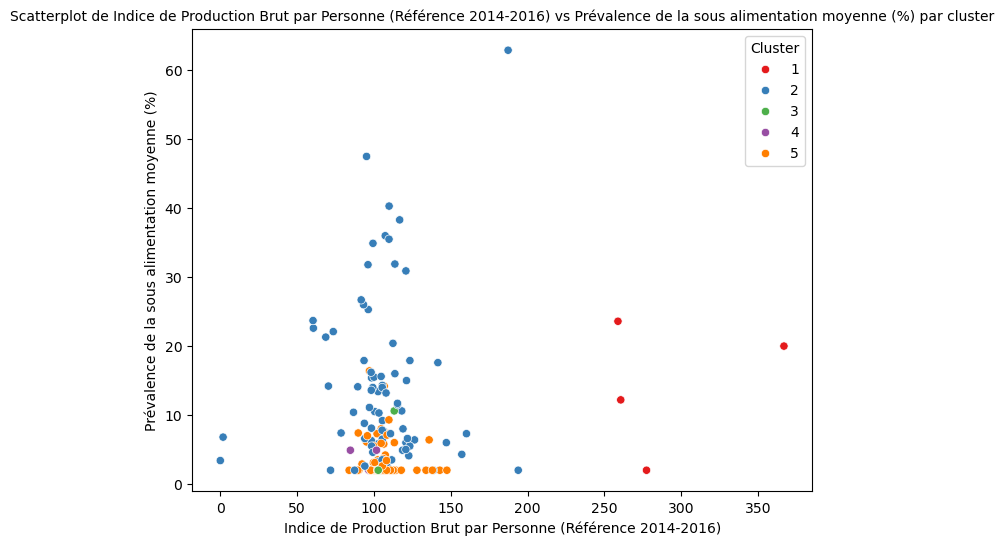

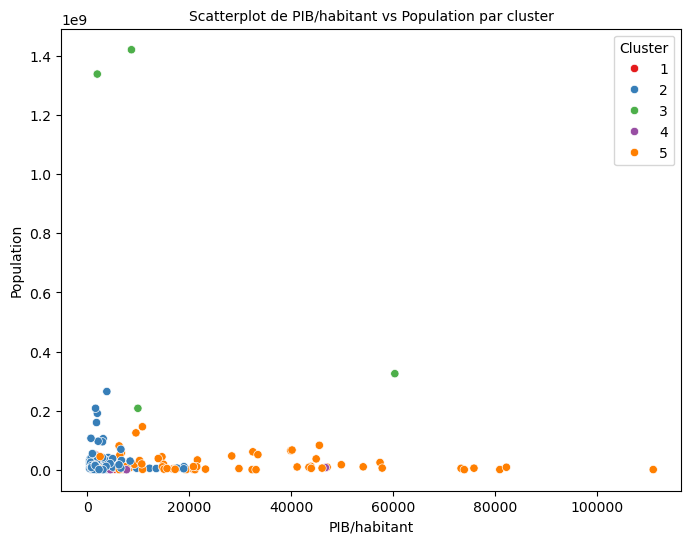

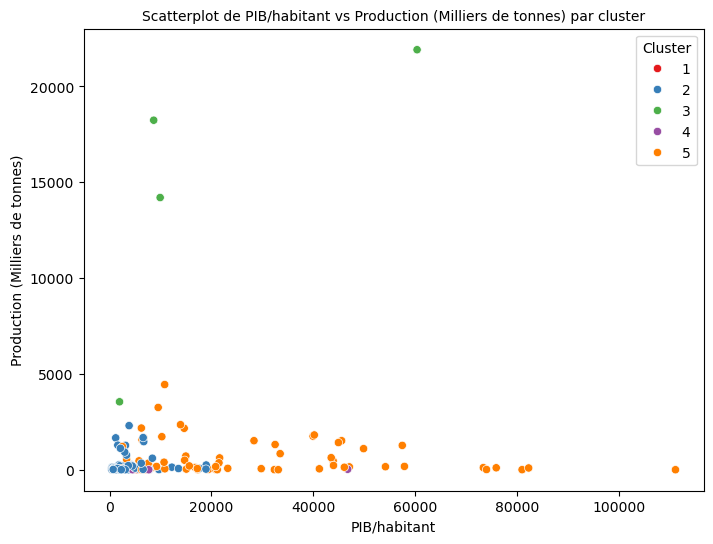

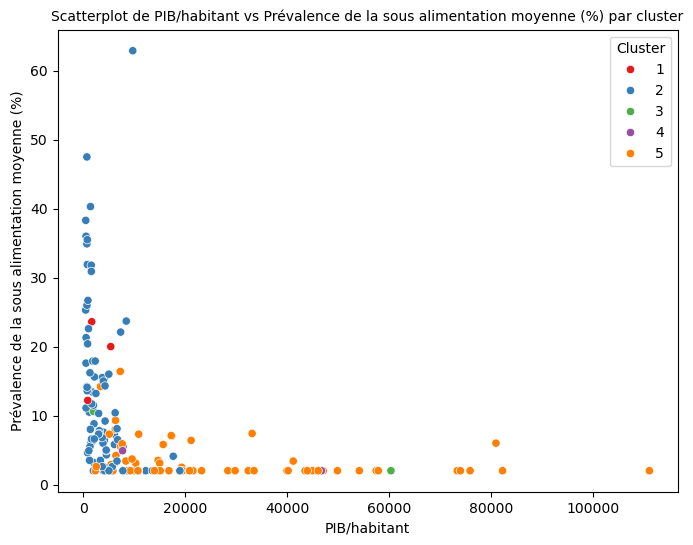

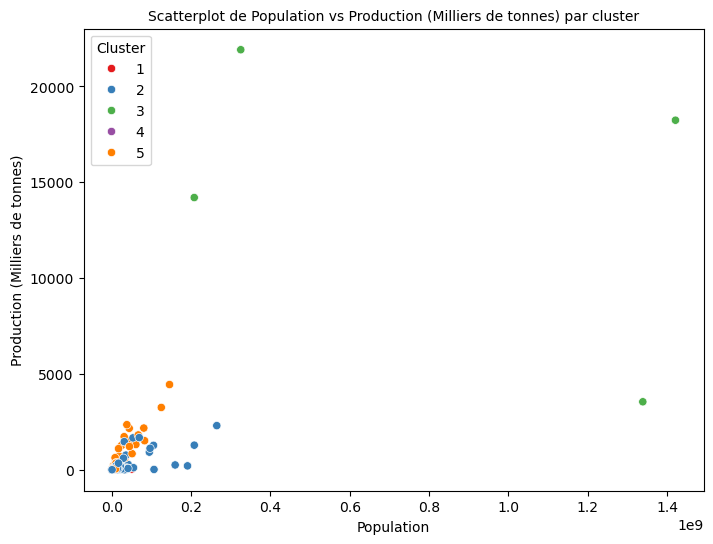

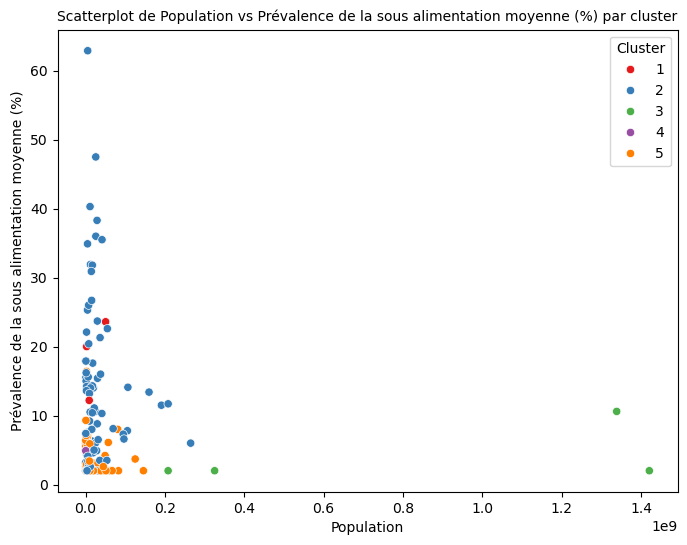

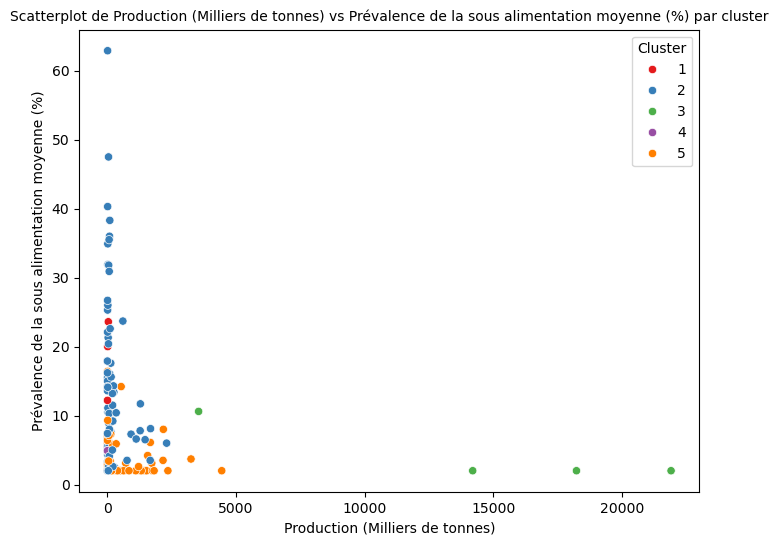

In [65]:
for i, var1 in enumerate(variables):
    for var2 in variables[i + 1:]:  # Pour éviter les doublons de combinaison
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=var1, y=var2, hue="cluster", palette="Set1")
        plt.title(f"Scatterplot de {var1} vs {var2} par cluster", fontsize=10)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.legend(title="Cluster")
        plt.show()

# K-means

In [71]:
X2 = df.copy()
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)



In [72]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X2_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

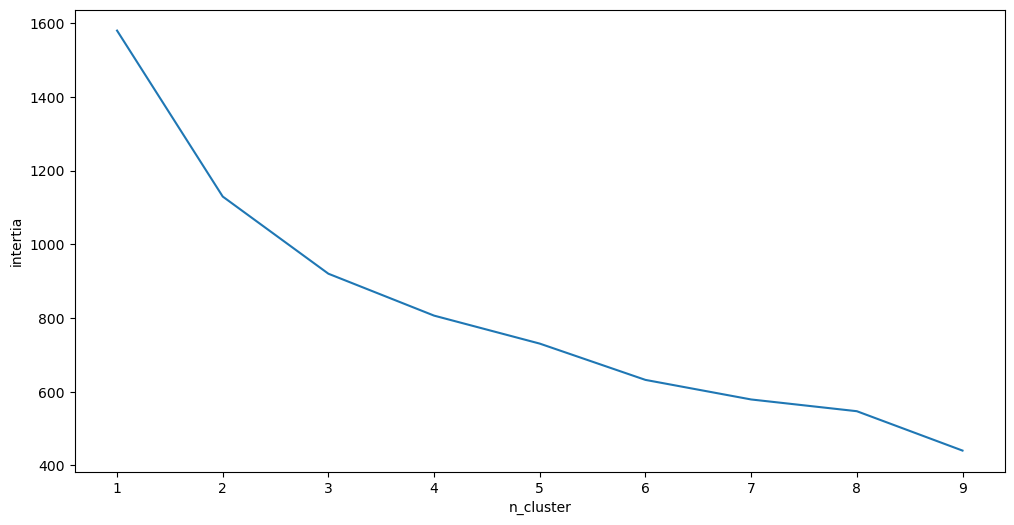

In [74]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [75]:
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(X2_scaled)

KMeans(n_clusters=3, random_state=12)

In [76]:
df.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Production (Milliers de tonnes)  Population  \
Pays                                                          
Afghanistan                                28.0  36296113.0   
Afrique du Sud                           1667.0  57009756.0   
Albanie                                    13.0   2884169.0   
Algérie                                   275.0  41389189.0   
Allemagne                                1514.0  82658409.0   

                Croissance annuelle %  \
Pays                                    
Afghanistan                  4.444345   
Afrique du Sud              17.791964   
Albanie                      9.767331   
Algérie                      6.287893   
Allemagne                    6.368624   

                Prévalence de la sous alimentation moyenne (%)  \
Pays                                                             
Afghanistan                                               21.3   
Afrique du Sud                                             6.1   
Albanie                                                    4.3   
Algérie                                                    2.5   
Allemagne                                                  2.0   

                Indice de Production Brut par Personne (Référence 2014-2016)  \
Pays                                                                           
Afghanistan                                                 68.65              
Afrique du Sud                                              95.23              
Albanie                                                    157.21              
Algérie                                                    108.73              
Allemagne                                                   97.94              

                PIB/habitant  Importations (kg par personne  cluster  
Pays                                                                  
Afghanistan       524.417114                       0.798984        2  
Afrique du Sud   6685.464789                       9.016001        5  
Albanie          4514.205415                      13.175372        2  
Algérie          4109.696067                       0.048322        2  
Allemagne       45525.825010                      10.186501        5

In [77]:
X = df[[
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "PIB/habitant",
    "Importations (kg par personne",
    "Croissance annuelle %"
]]

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1> Identification des clusters avec des centroides </h1>

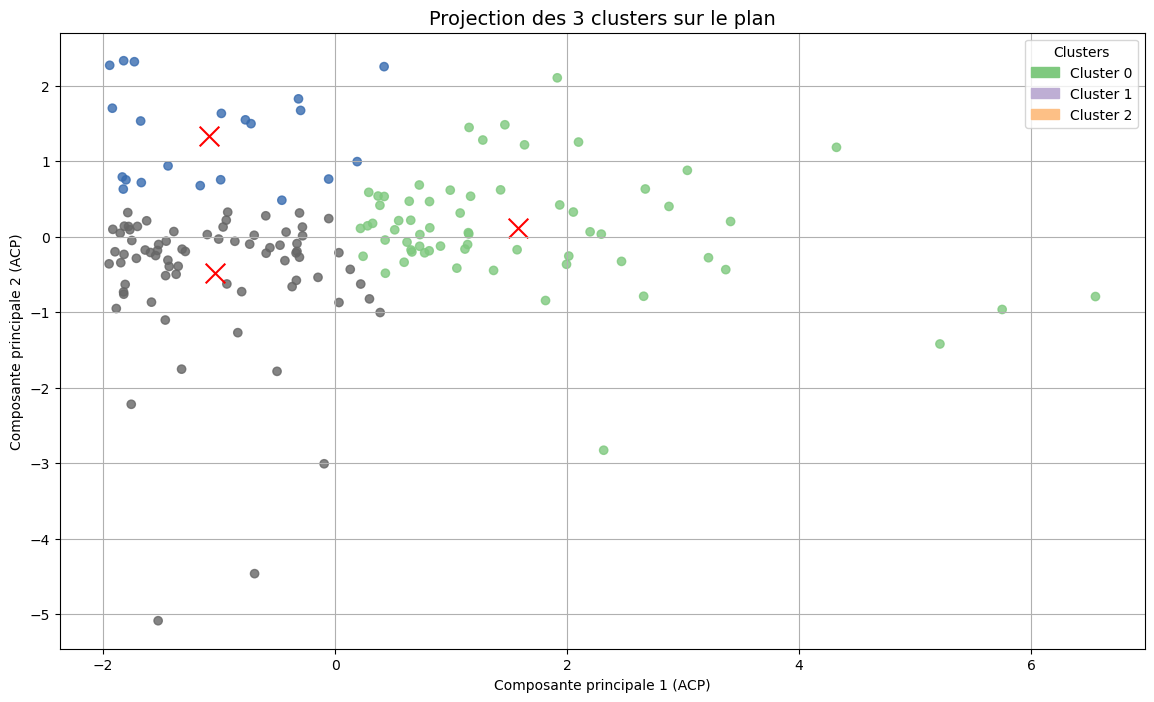

Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Production (Milliers de tonnes)  Population  \
Pays                                                          
Afghanistan                                28.0  36296113.0   
Afrique du Sud                           1667.0  57009756.0   
Albanie                                    13.0   2884169.0   
Algérie                                   275.0  41389189.0   
Allemagne                                1514.0  82658409.0   

                Croissance annuelle %  \
Pays                                    
Afghanistan                  4.444345   
Afrique du Sud              17.791964   
Albanie                      9.767331   
Algérie                      6.287893   
Allemagne                    6.368624   

                Prévalence de la sous alimentation moyenne (%)  \
Pays                                                             
Afghanistan                                               21.3   
Afrique du Sud                                             6.1   
Albanie                                                    4.3   
Algérie                                                    2.5   
Allemagne                                                  2.0   

                Indice de Production Brut par Personne (Référence 2014-2016)  \
Pays                                                                           
Afghanistan                                                 68.65              
Afrique du Sud                                              95.23              
Albanie                                                    157.21              
Algérie                                                    108.73              
Allemagne                                                   97.94              

                PIB/habitant  Importations (kg par personne  cluster  
Pays                                                                  
Afghanistan       524.417114                       0.798984        2  
Afrique du Sud   6685.464789                       9.016001        0  
Albanie          4514.205415                      13.175372        2  
Algérie          4109.696067                       0.048322        2  
Allemagne       45525.825010                      10.186501        0

In [107]:
# 🔹 Sélection des variables pertinentes pour le clustering
X = df[[
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "PIB/habitant",
    "Importations (kg par personne",
    "Croissance annuelle %"
]]

# 🔹 Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Définition du nombre de clusters
from sklearn.cluster import KMeans
from sklearn import decomposition
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n_clust = 3
Y = X_scaled

# 🔹 Application du modèle K-means
km = KMeans(n_clusters=n_clust, random_state=3)
km.fit(Y)
clusters = km.labels_
centroids = km.cluster_centers_

# 🔹 Projection des données en 2 dimensions (ACP)
pca = decomposition.PCA(n_components=2)
Y_projected = pca.fit_transform(Y)
centroids_projected = pca.transform(centroids)

# 🔹 Visualisation
plt.figure(figsize=(14,8))
plt.scatter(Y_projected[:, 0], Y_projected[:, 1],
            c=clusters, cmap='Accent', alpha=0.8)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1],
            marker="x", color='red', s=200, label='Centroïdes')

plt.title(f"Projection des {n_clust} clusters sur le plan", fontsize=14)
plt.xlabel("Composante principale 1 (ACP)")
plt.ylabel("Composante principale 2 (ACP)")
plt.grid(True)


# 🔹 Ajout d'une légende couleur pour chaque cluster
patches = []
colors = plt.cm.Accent.colors  # même palette utilisée dans le scatter
for i in range(n_clust):
    patches.append(mpatches.Patch(color=colors[i], label=f"Cluster {i}"))
plt.legend(handles=patches, title="Clusters", loc="upper right")

plt.show()

# 🔹 Ajout du cluster à ton DataFrame d’origine
df["cluster"] = clusters

# 🔹 Affichage des premières lignes
df.head()

In [81]:
df.shape[0]

158

In [82]:
# Récupération des clusters pour chaque pays
clusters = km.labels_

# Si les pays sont dans l'index :
df_clusters = pd.DataFrame({
    "Pays": df.index,          # on récupère les noms des pays depuis l’index
    "Cluster": clusters        # on ajoute les clusters prédits
})

# Réinitialisation de l'index
df_clusters = df_clusters.reset_index(drop=True)

# Affichage des 10 premiers pays avec leur cluster
df_clusters.head(158)

Pays  Cluster
0              Afghanistan        2
1           Afrique du Sud        0
2                  Albanie        2
3                  Algérie        2
4                Allemagne        0
..                     ...      ...
153    Émirats arabes unis        0
154               Équateur        2
155  États-Unis d'Amérique        0
156               Éthiopie        2
157           Îles Salomon        2

[158 rows x 2 columns]

In [83]:
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [84]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'b', 'a', 'a', 'c', 'a', 'b', 'b', 'a', 'c']

In [88]:
X2 = pd.DataFrame(data=X2)

In [100]:
X2["cluster_k"] = labels
X2

Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'Amérique                                              55.68        
Éthiopie                                                            0.13        
Îles Salomon                                                        4.45        

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

                       Production (Milliers de tonnes)   Population  \
Pays                                                                  
Afghanistan                                       28.0   36296113.0   
Afrique du Sud                                  1667.0   57009756.0   
Albanie                                           13.0    2884169.0   
Algérie                                          275.0   41389189.0   
Allemagne                                       1514.0   82658409.0   
...                                                ...          ...   
Émirats arabes unis                               48.0    9487203.0   
Équateur                                         340.0   16785361.0   
États-Unis d'Amérique                          21914.0  325084756.0   
Éthiopie                                          14.0  106399924.0   
Îles Salomon                                       0.0     636039.0   

                       Croissance annuelle %  \
Pays                                           
Afghanistan                         4.444345   
Afrique du Sud                     17.791964   
Albanie                             9.767331   
Algérie                             6.287893   
Allemagne                           6.368624   
...                                      ...   
Émirats arabes unis                 5.757934   
Équateur                            6.958077   
États-Unis d'Amérique               4.292437   
Éthiopie                            6.426252   
Îles Salomon                        6.546216   

                       Prévalence de la sous alimentation moyenne (%)  \
Pays                                                                    
Afghanistan                                                      21.3   
Afrique du Sud                                                    6.1   
Albanie                                         

In [102]:
#sns.pairplot(X2, hue="cluster_k")

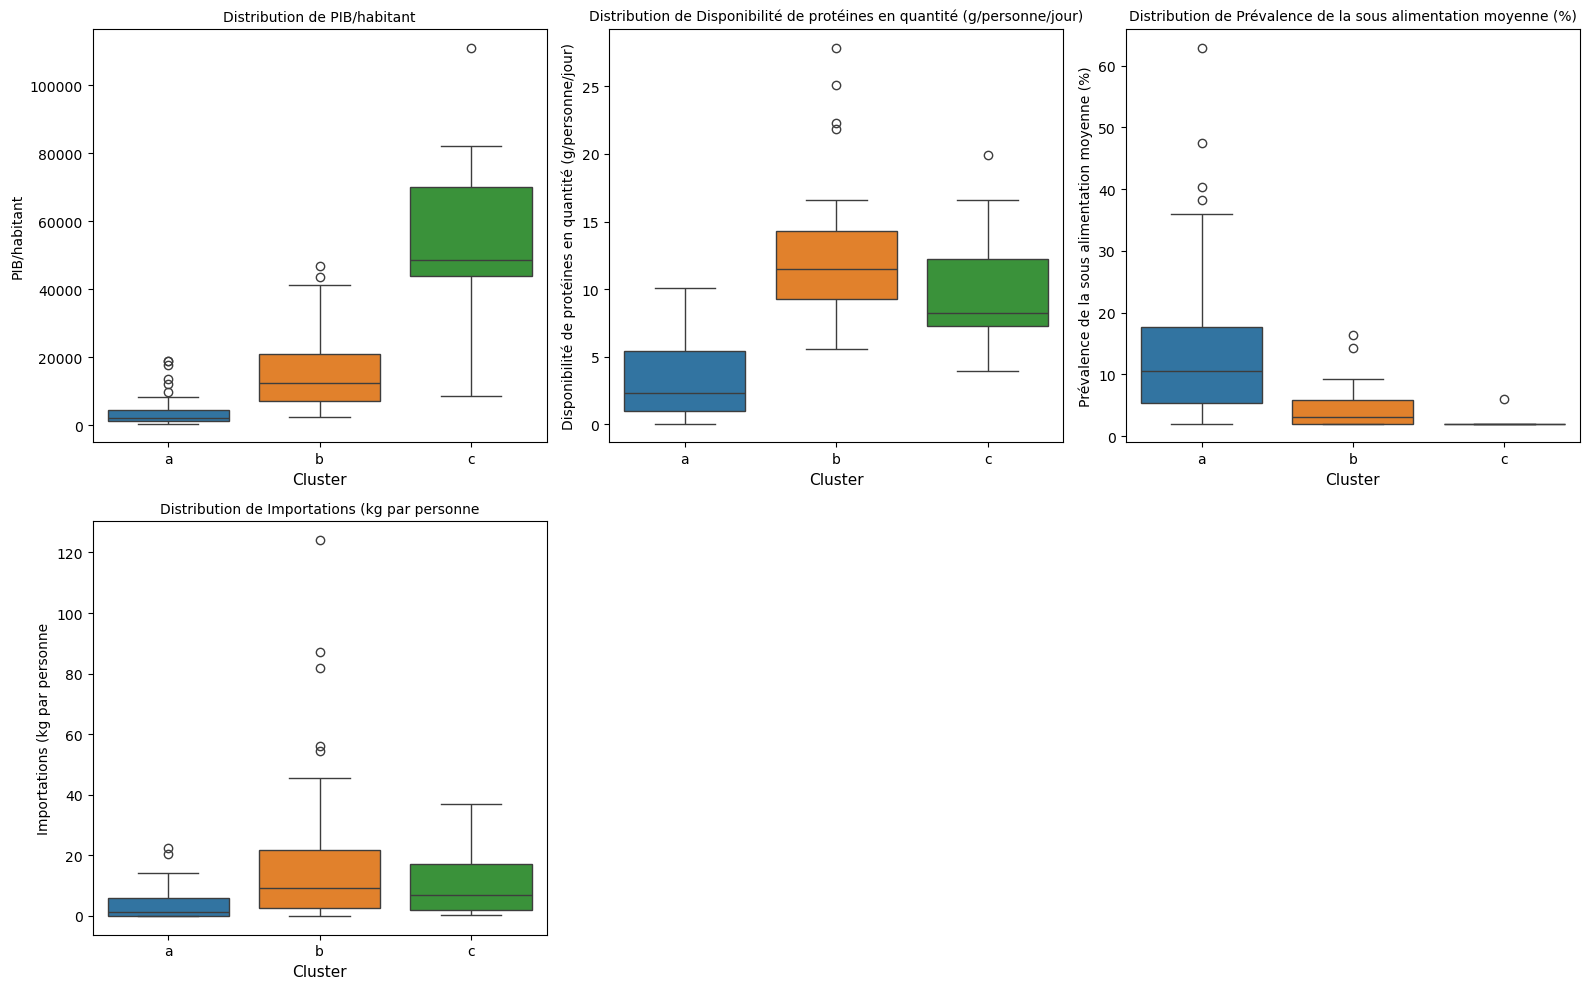

In [104]:
key_variables = ["PIB/habitant", "Disponibilité de protéines en quantité (g/personne/jour)", "Prévalence de la sous alimentation moyenne (%)",
                 "Importations (kg par personne"]

plt.figure(figsize=(16, 10))

for i, var in enumerate(key_variables):
    plt.subplot(2, 3, i + 1) 
    sns.boxplot(data=X2, x="cluster_k", y=var, hue="cluster_k")
    plt.title(f"Distribution de {var}", fontsize=10)
    plt.xlabel("Cluster", fontsize=11)
    plt.ylabel(var, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout() 
plt.show()



Le cluster b semble le plus interessant pour exporter de la volaille avec une importation modérée et une distribution de la disponibilité en protéines et de la prévalence de la sous alimentatino plutôt hétérogènes. 

In [82]:
X2['cluster_k'].value_counts()

cluster_k
a    88
b    48
c    22
Name: count, dtype: int64

On retrouve 76 pays dans le cluster prometteur, pour déterminer une liste réduite des pays vers lesquels il est interessant d'exporter, il faut croiser les pays du cluster a et ceux du cluster 5 de l'ACH.

In [85]:
result = X2[(X2['cluster'] == 5) & (X2['cluster_k'] == 'b')]
print(result.index)
print(len(result.index))

Index(['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Barbade',
       'Bolivie (État plurinational de)', 'Bulgarie', 'Bélarus', 'Chili',
       'Chypre', 'Colombie', 'Dominique', 'Espagne', 'Estonie',
       'Fédération de Russie', 'Gabon', 'Guyana', 'Hongrie',
       'Iran (République islamique d')', 'Israël', 'Jamaïque', 'Kazakhstan',
       'Koweït', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Malaisie',
       'Malte', 'Maurice', 'Mexique', 'Nouvelle-Calédonie', 'Oman', 'Panama',
       'Pologne', 'Polynésie française', 'Portugal', 'Roumanie',
       'République de Moldova', 'République dominicaine', 'Slovénie',
       'Suriname', 'Tchéquie', 'Trinité-et-Tobago', 'Ukraine',
       'Émirats arabes unis'],
      dtype='object', name='Pays')
44
